In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 20)
warnings.simplefilter("ignore")

In [9]:
df1 = pd.read_csv("../boston.csv")

In [12]:
print(df1.head())
print(df1.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
(506, 14)


In [31]:
print(df1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [13]:
data = np.hstack([df1.values[::2, :], df1.values[1::2, :2]])
target = df1.values[1::2, 2]
print(df1.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [14]:
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
df = pd.DataFrame(data, columns=columns)
df['PRICE'] = target

ValueError: Shape of passed values is (253, 16), indices imply (253, 13)

In [15]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model and scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

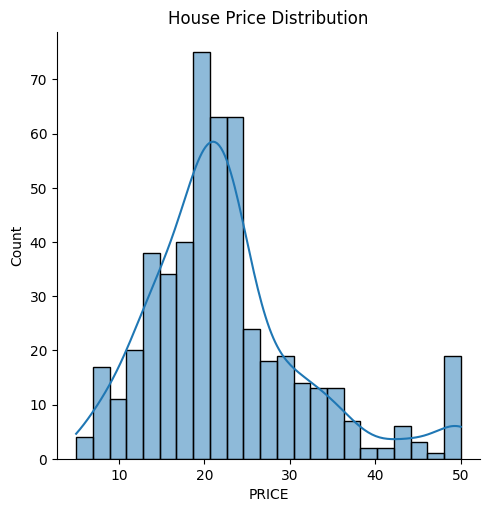

In [33]:
sns.displot(df1["PRICE"], kde=True)
plt.title("House Price Distribution")
plt.show()

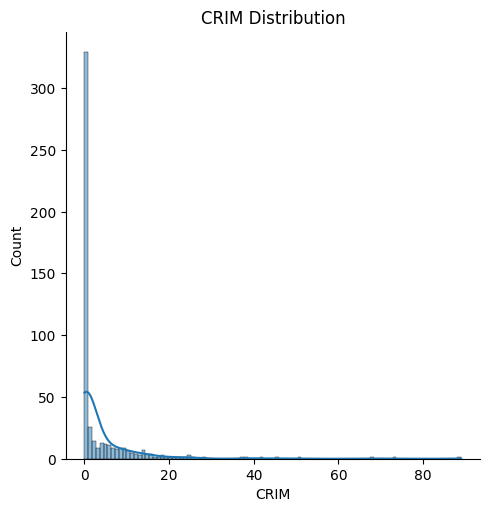

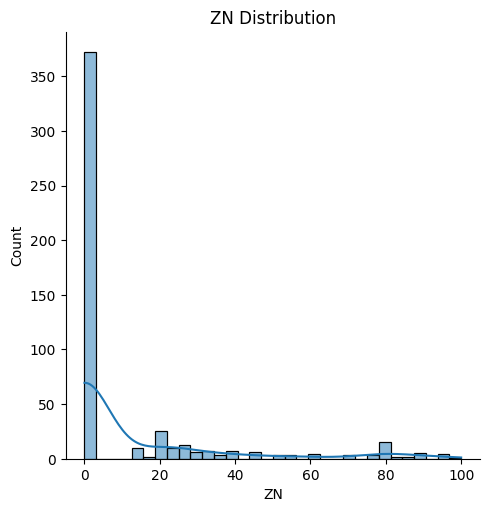

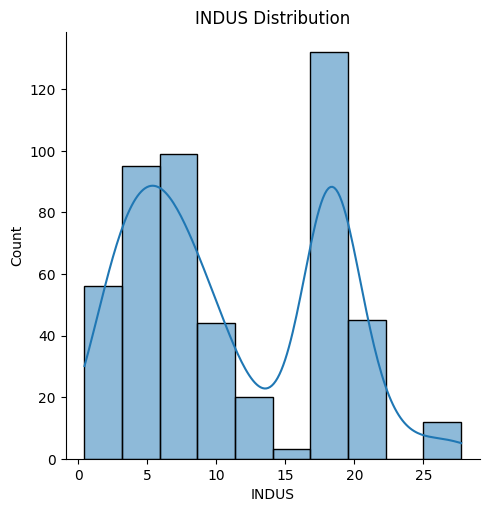

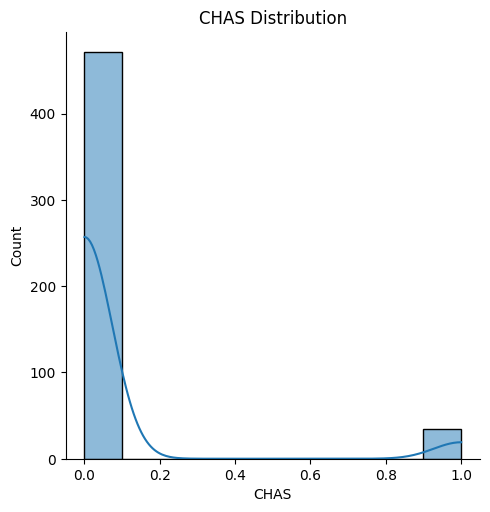

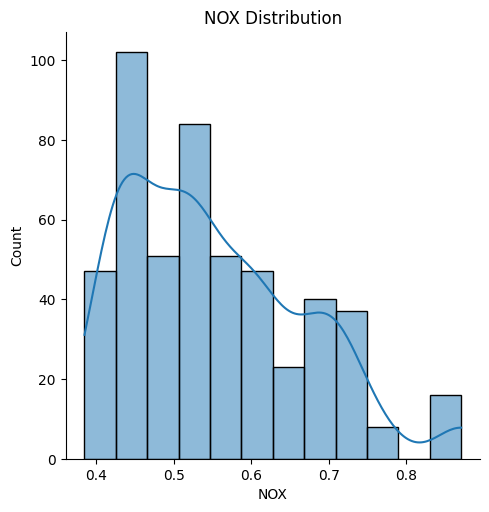

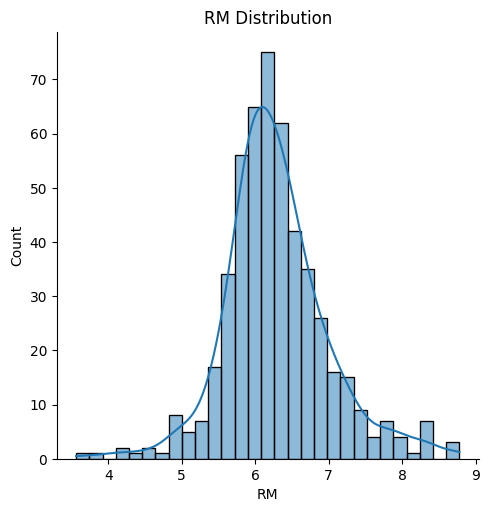

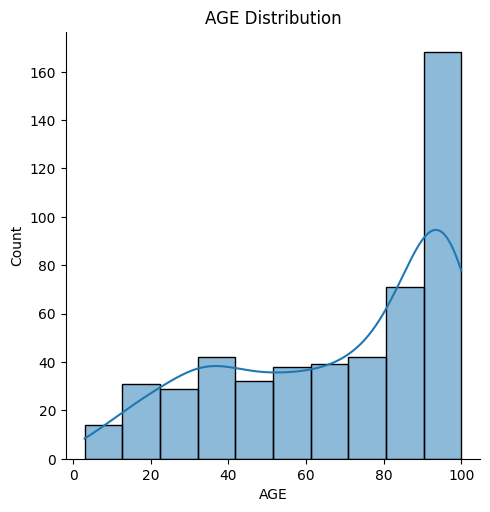

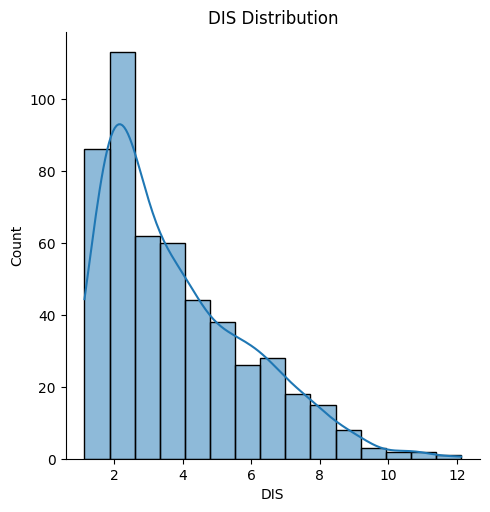

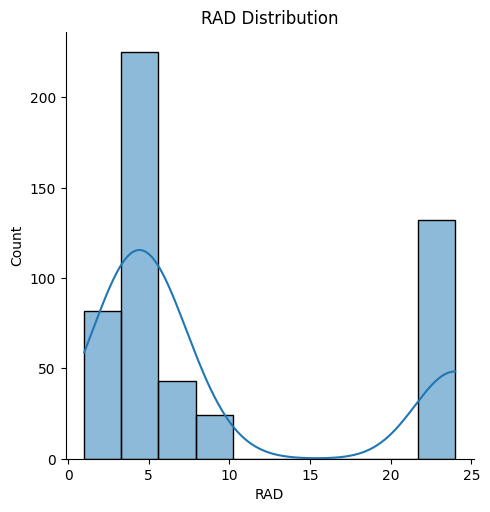

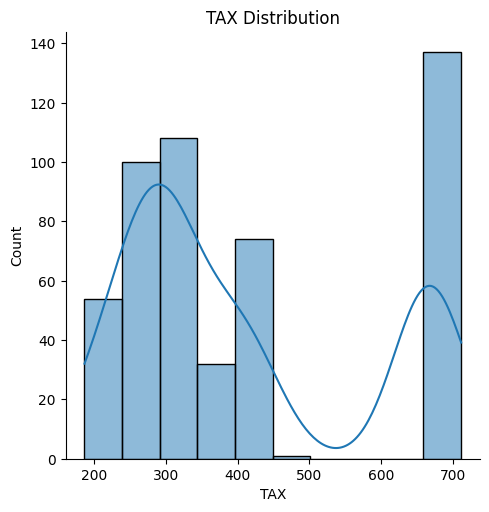

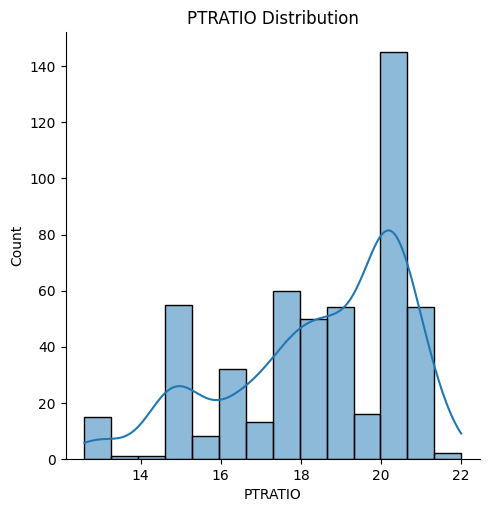

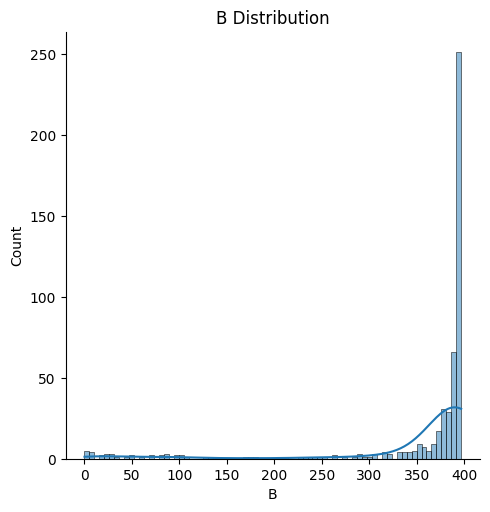

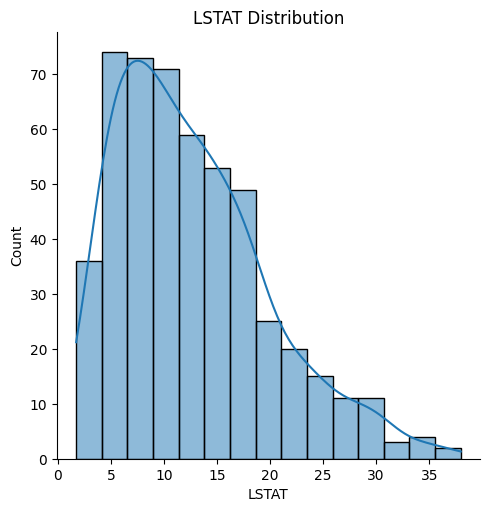

In [34]:
for feature in df1.columns[:-1]:
    sns.displot(df1[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.show()


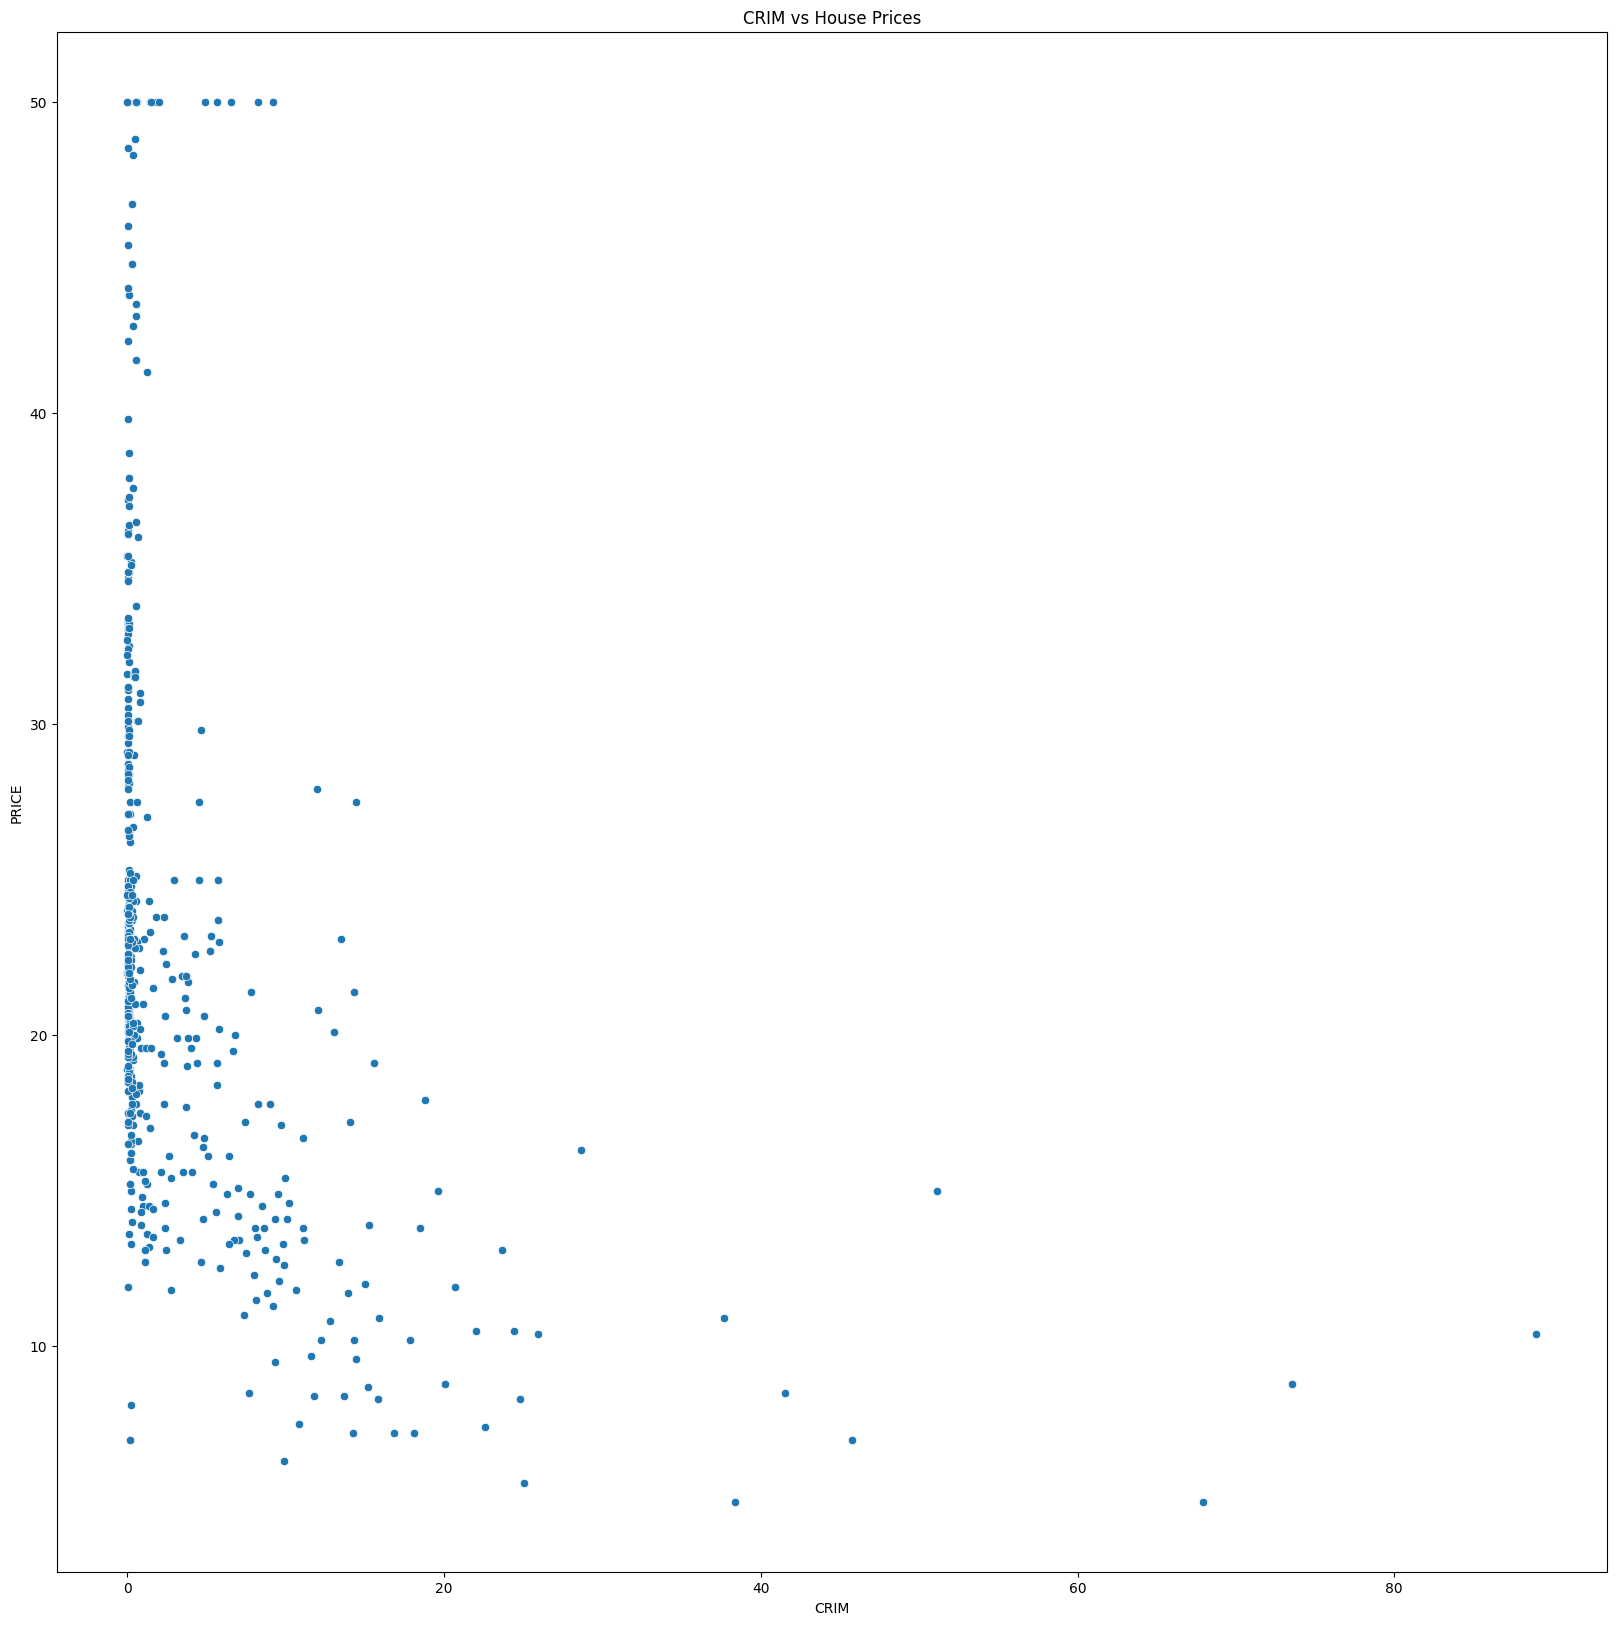

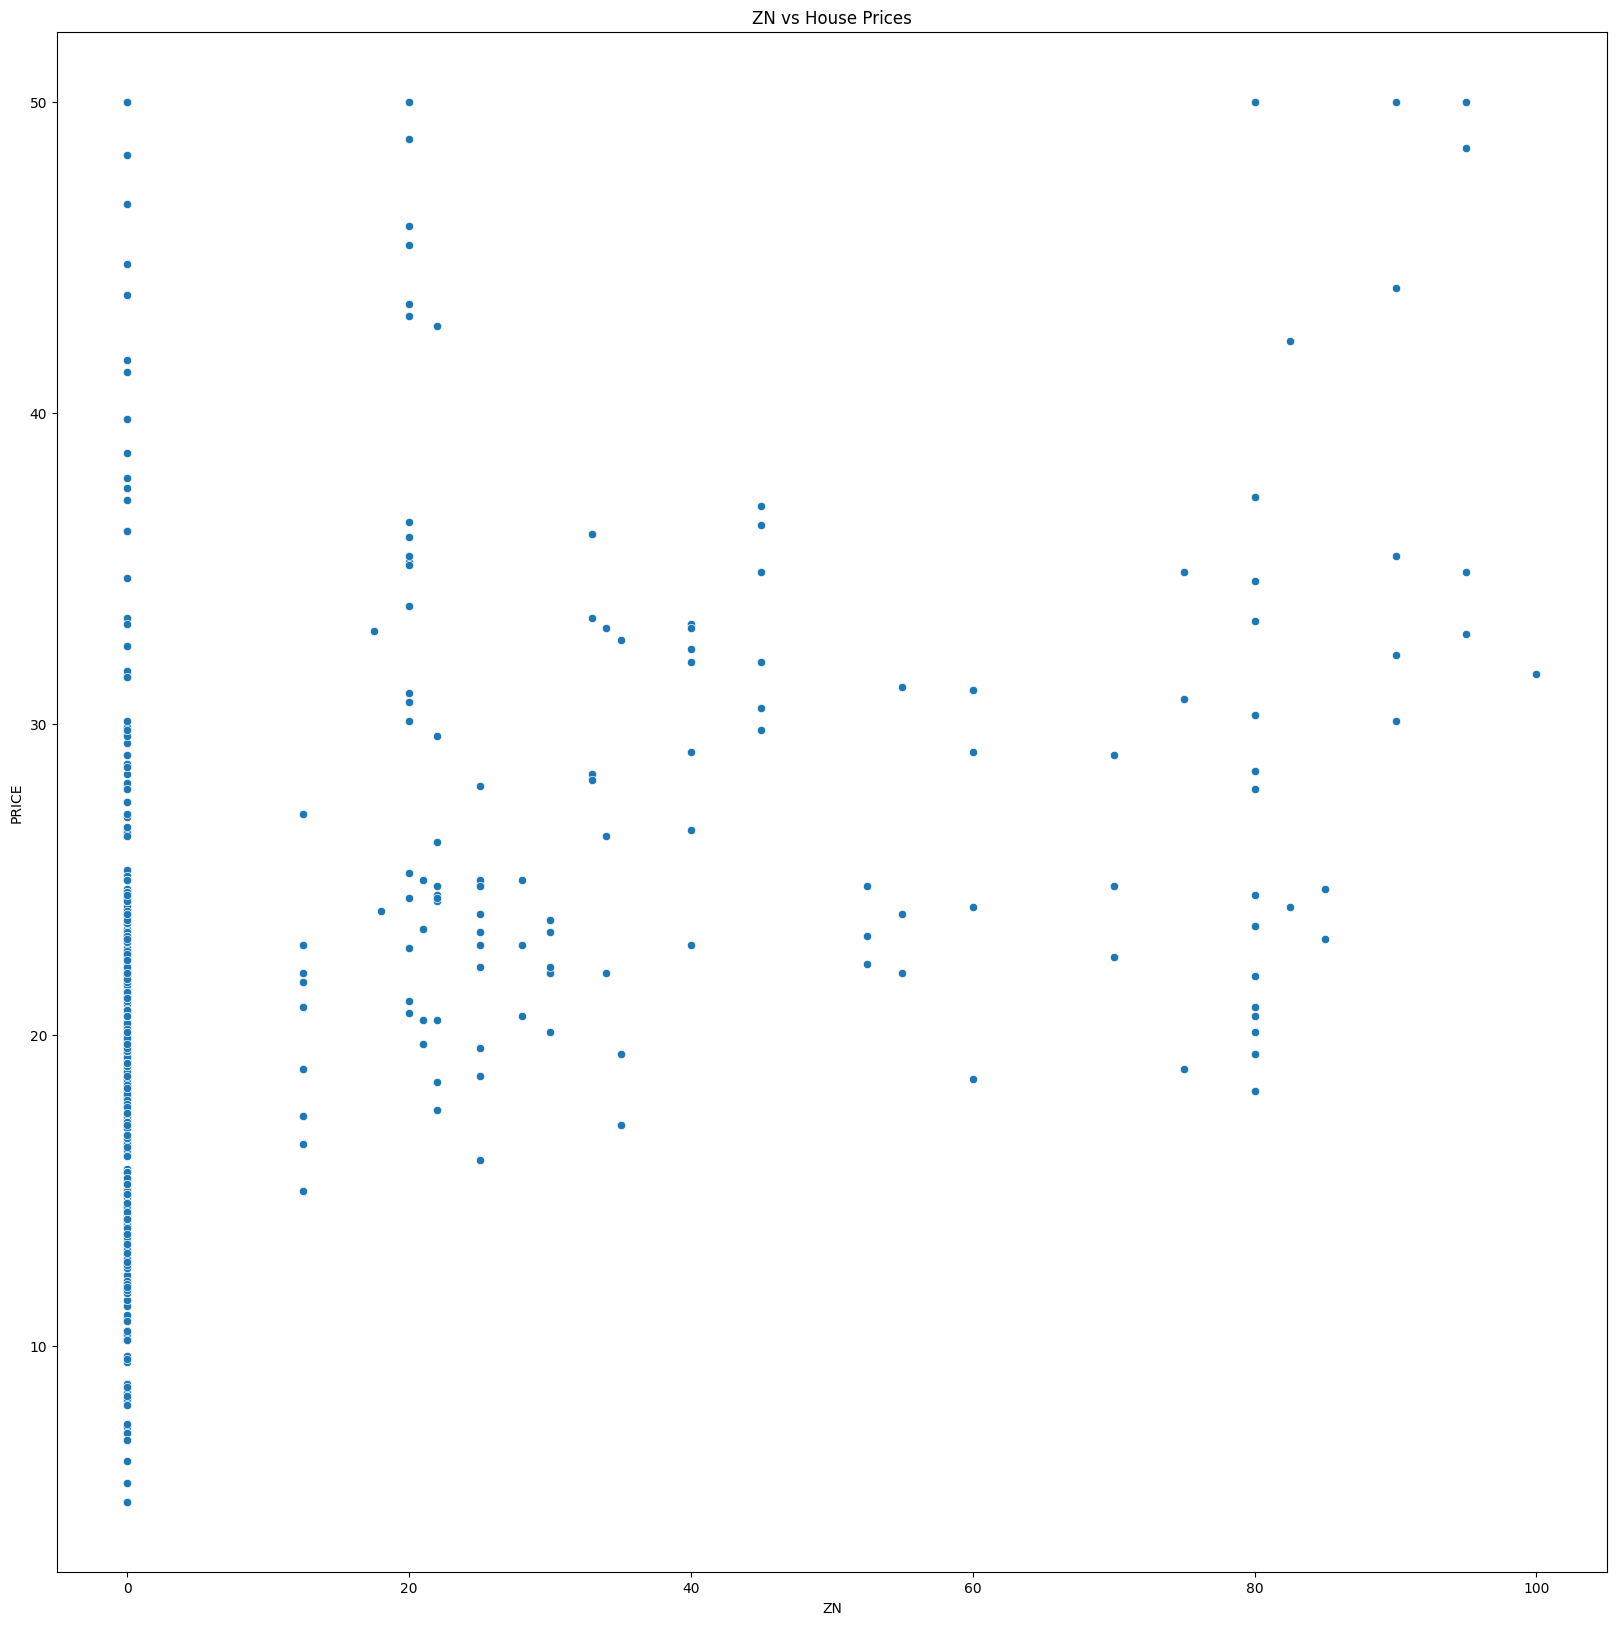

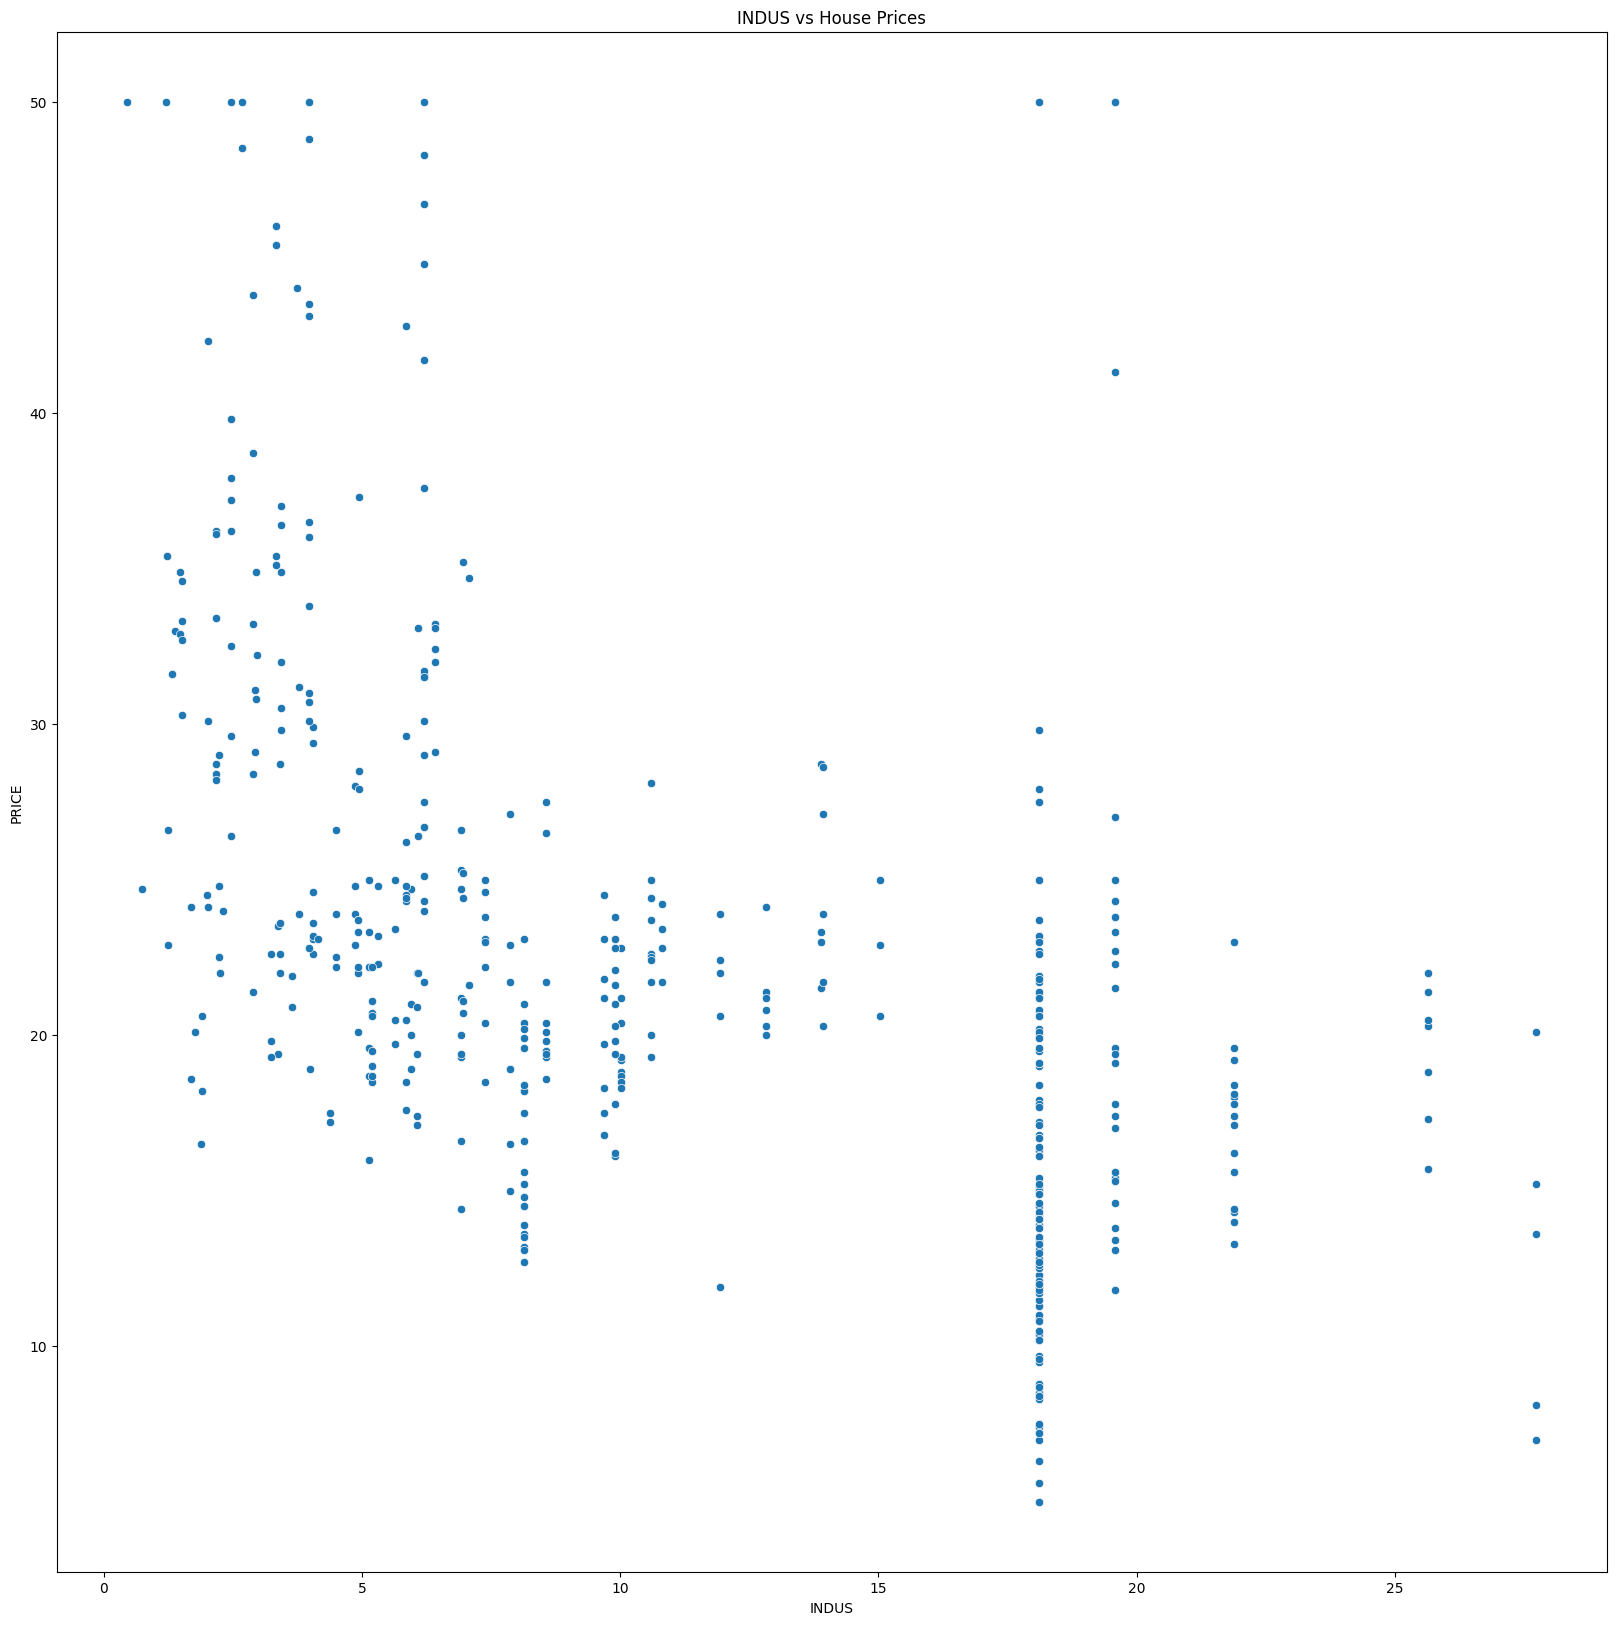

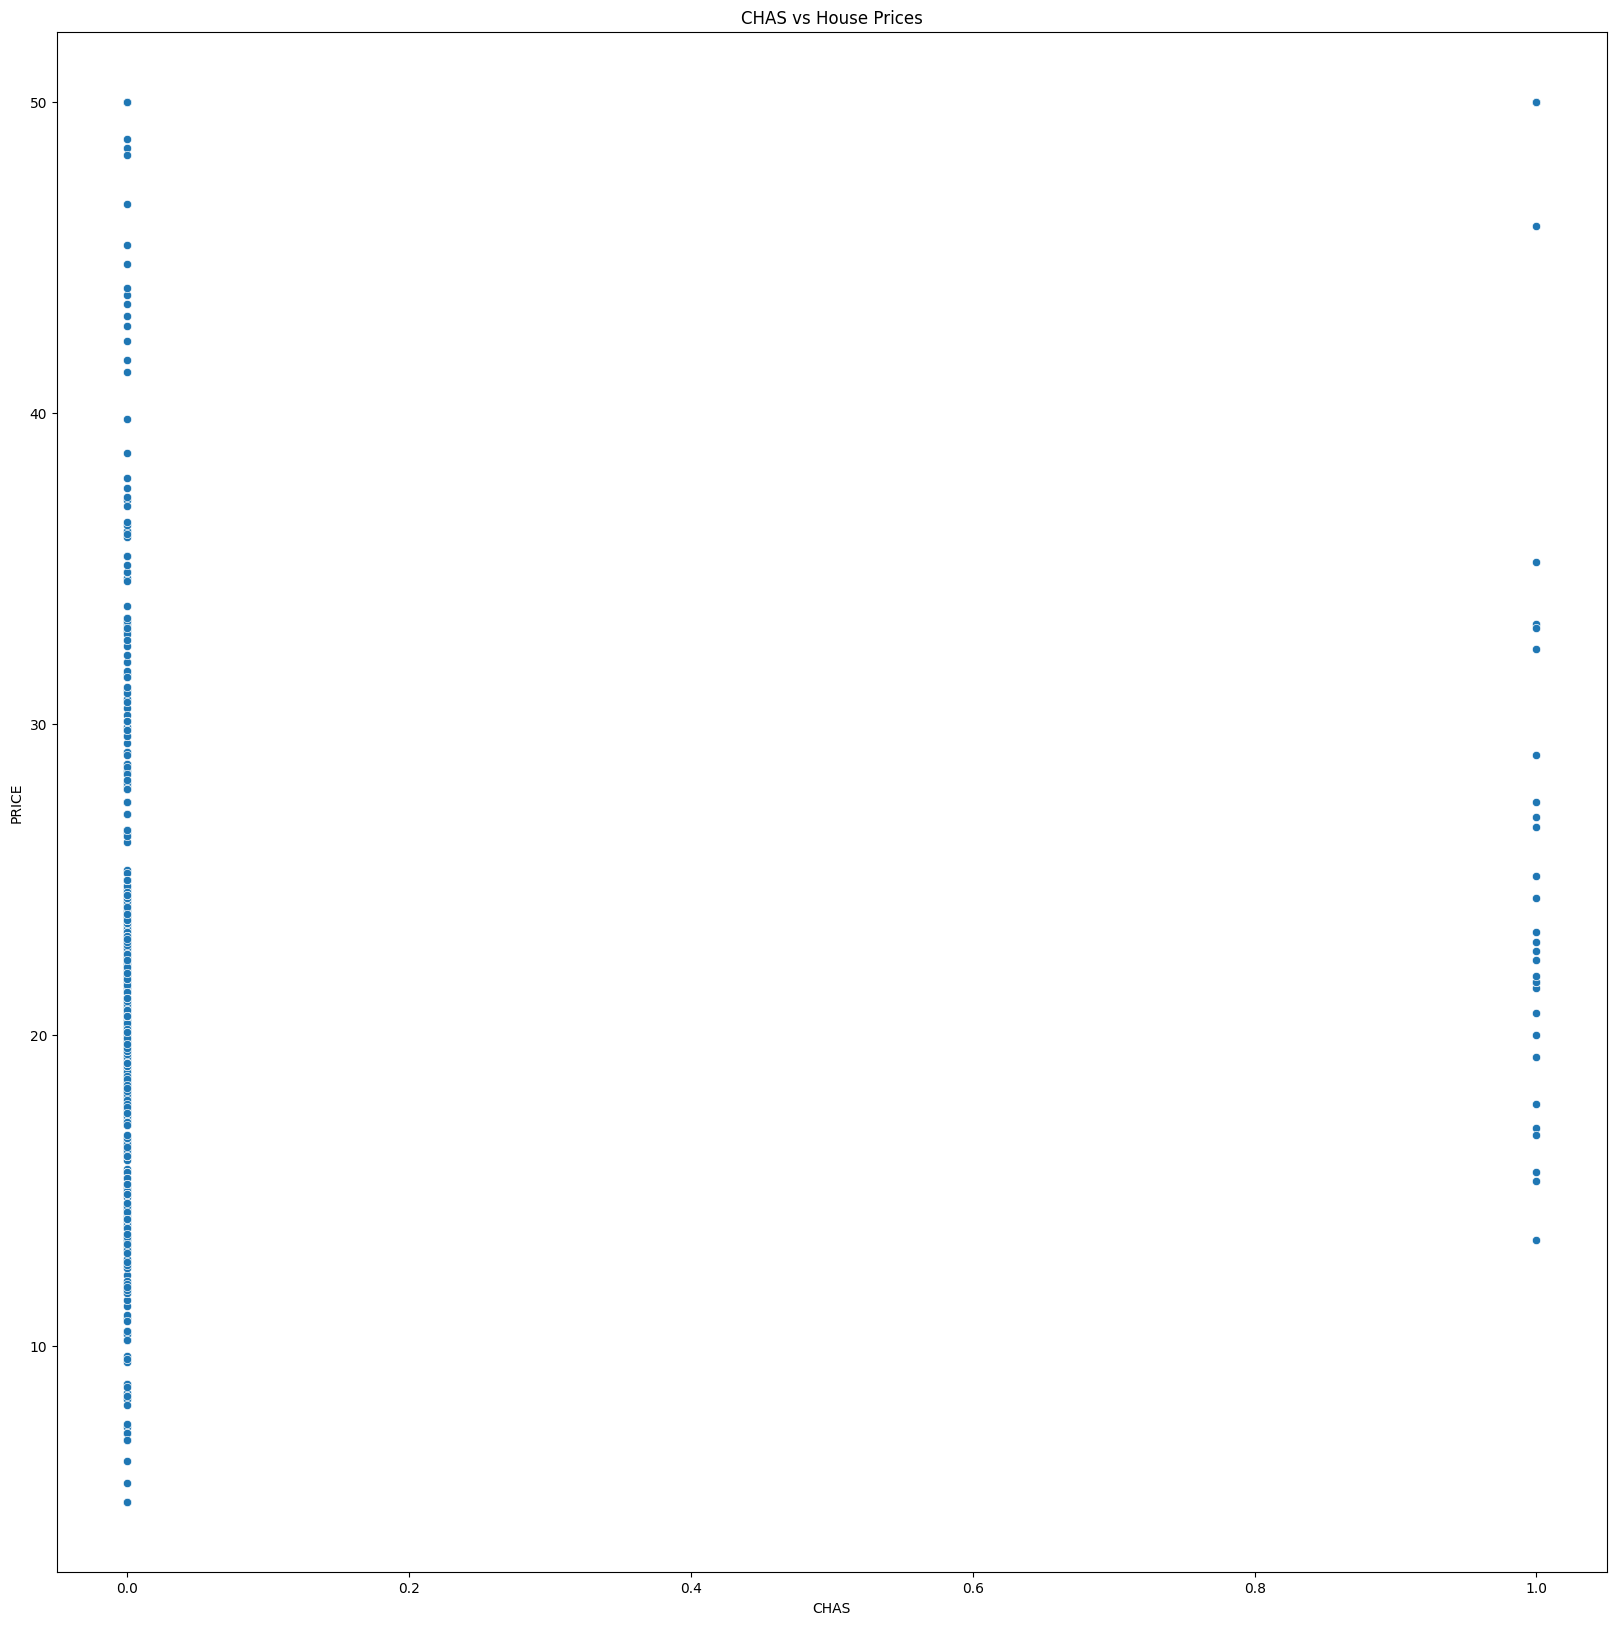

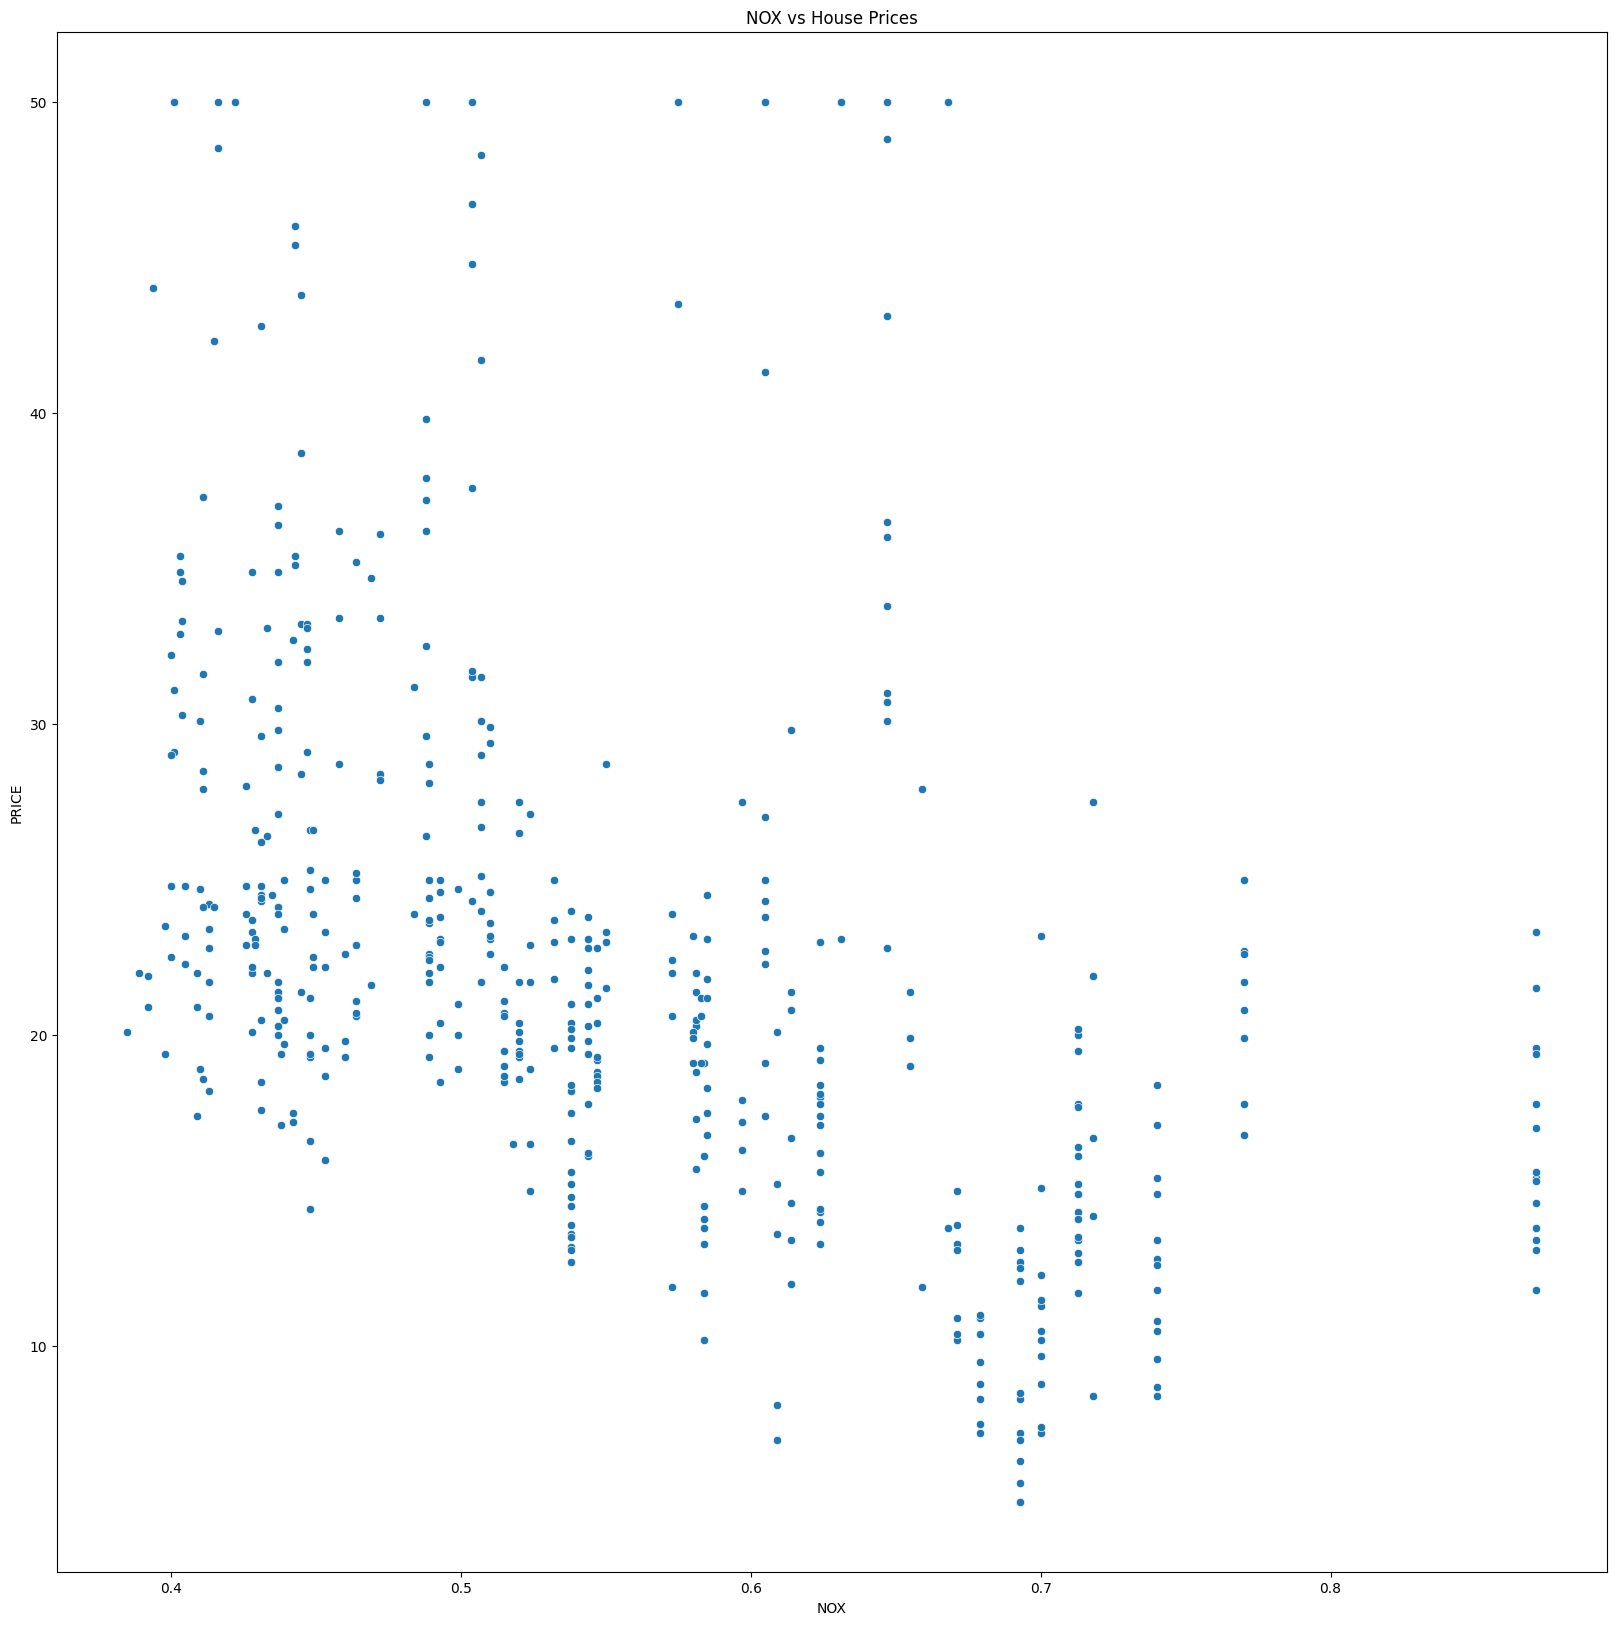

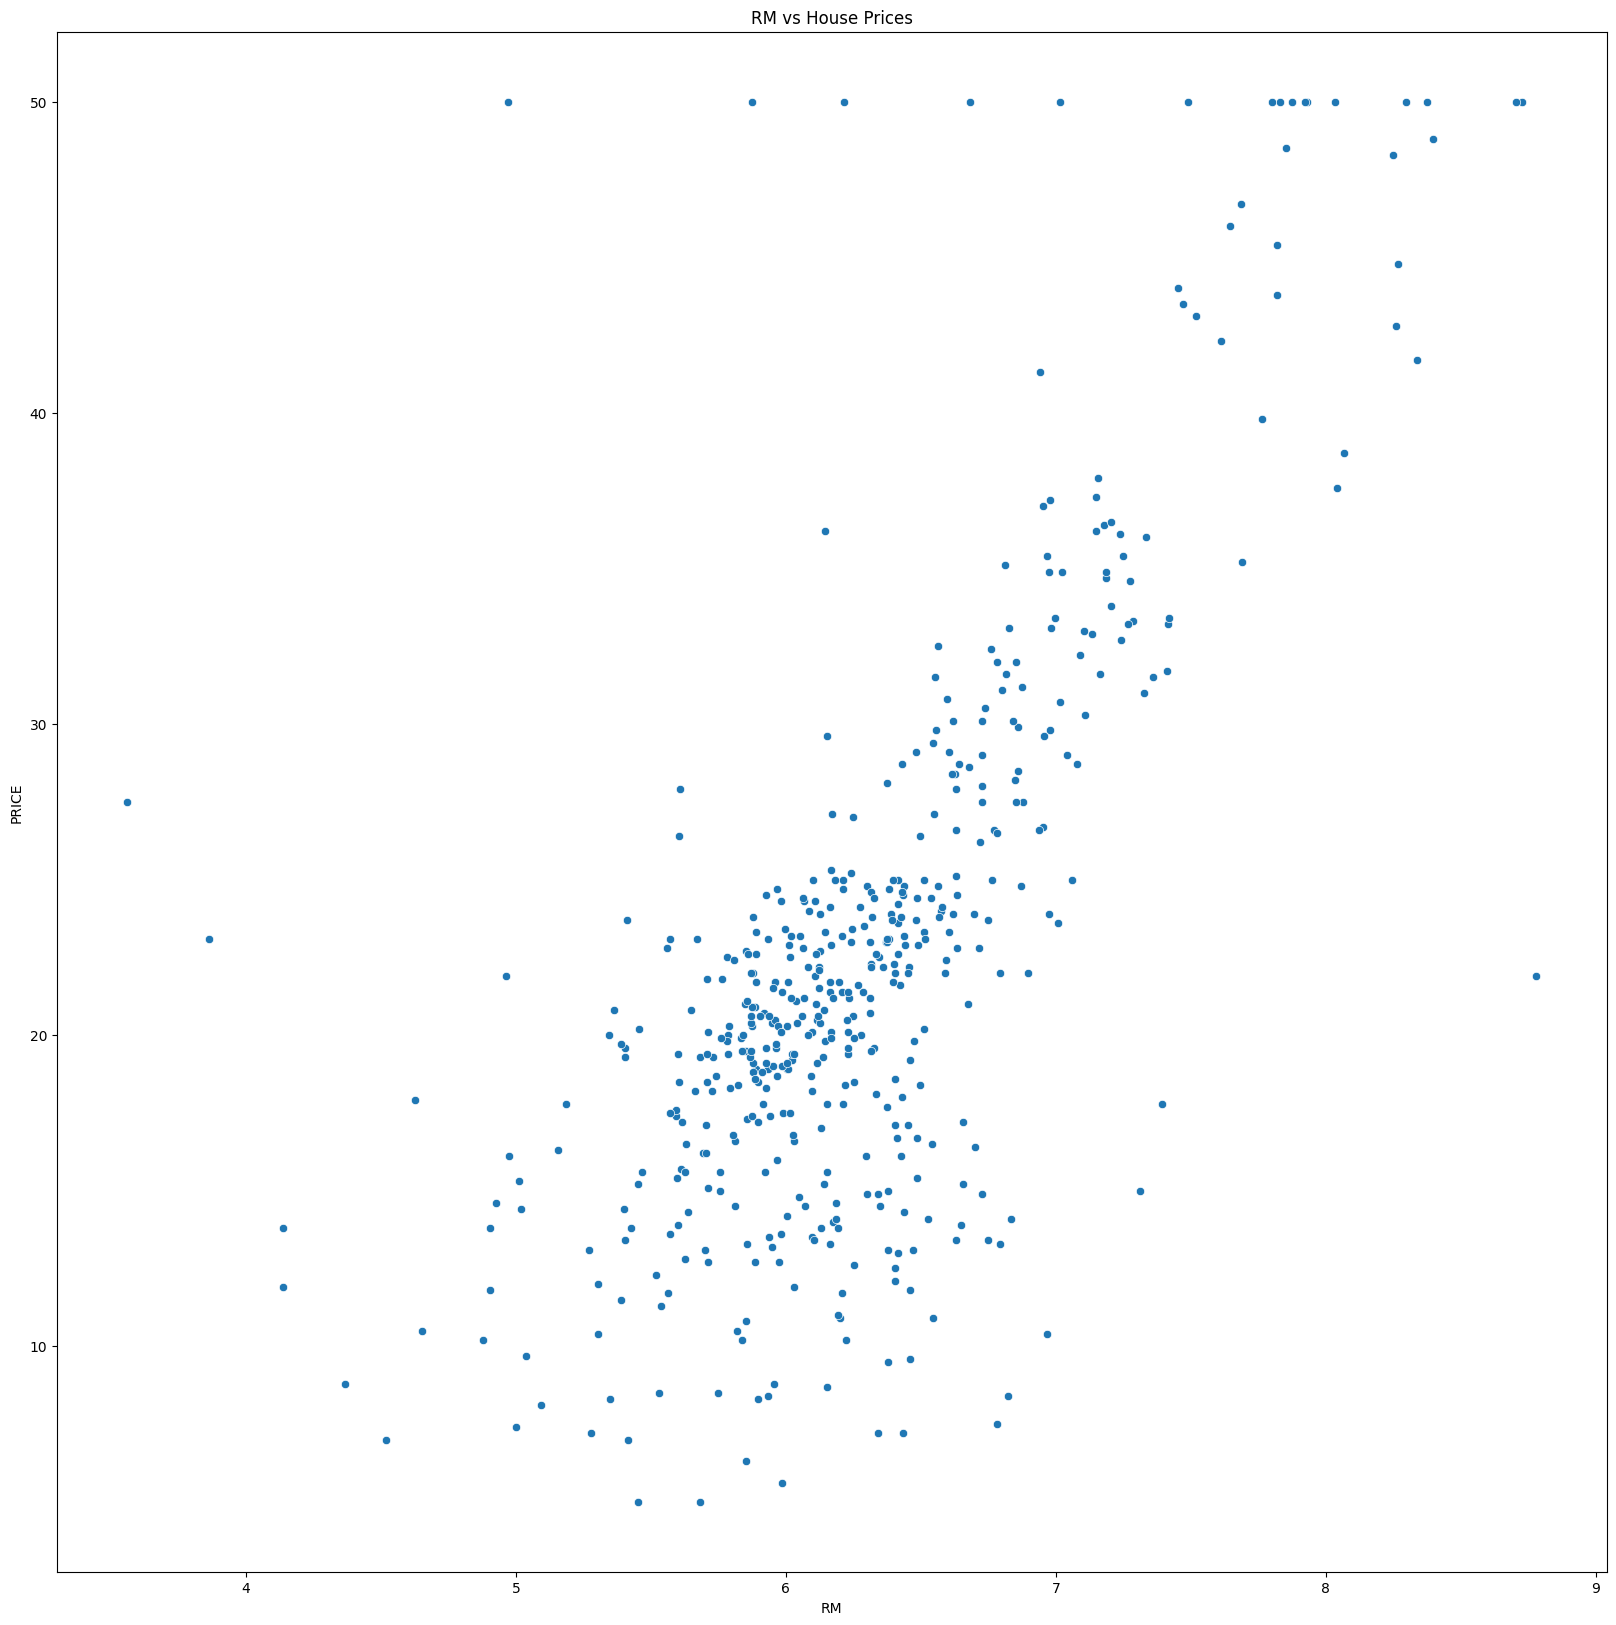

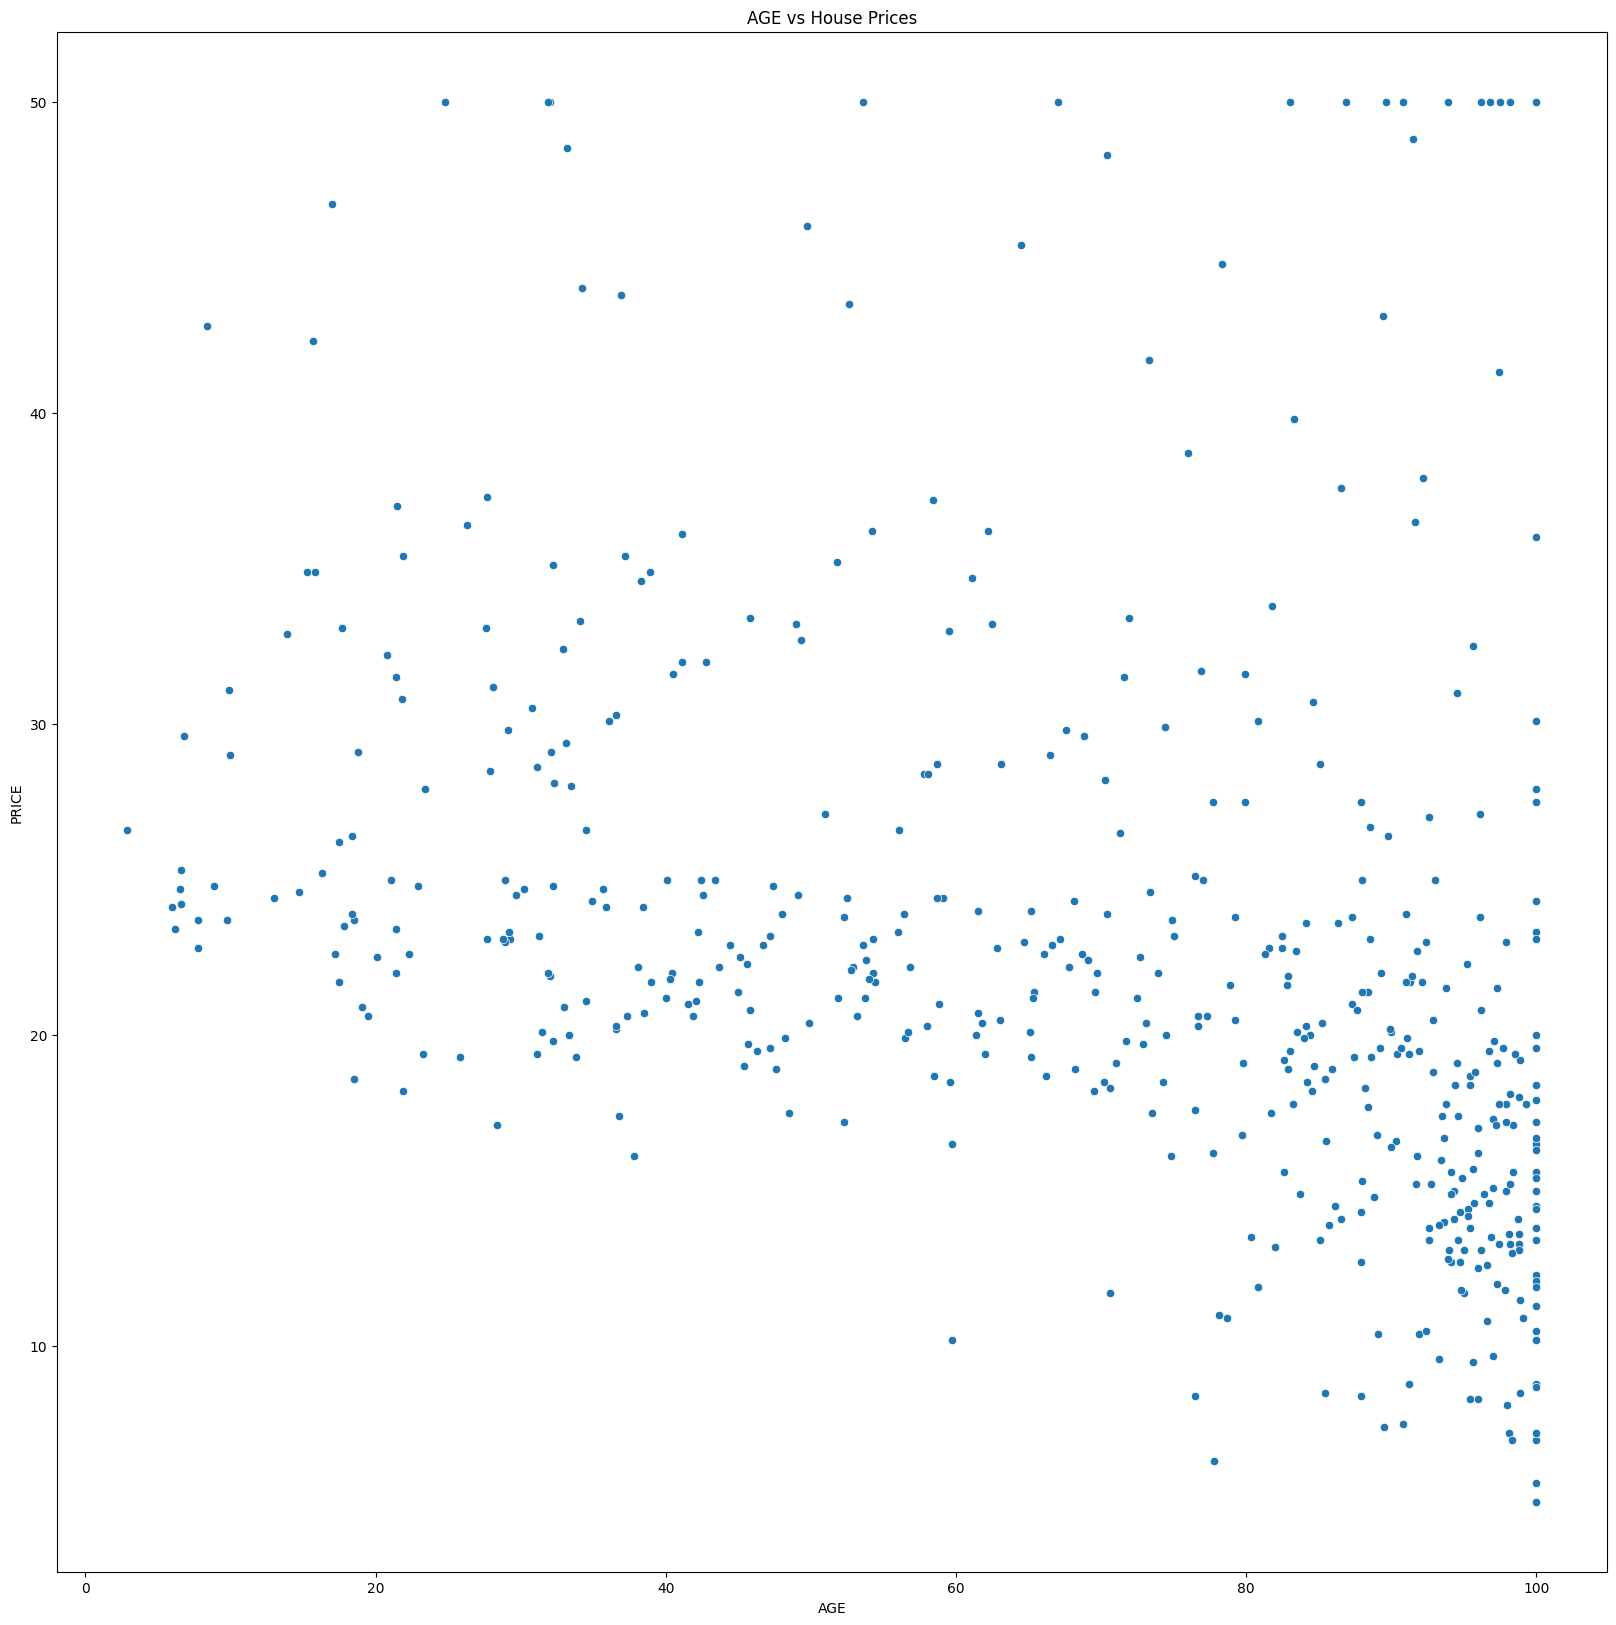

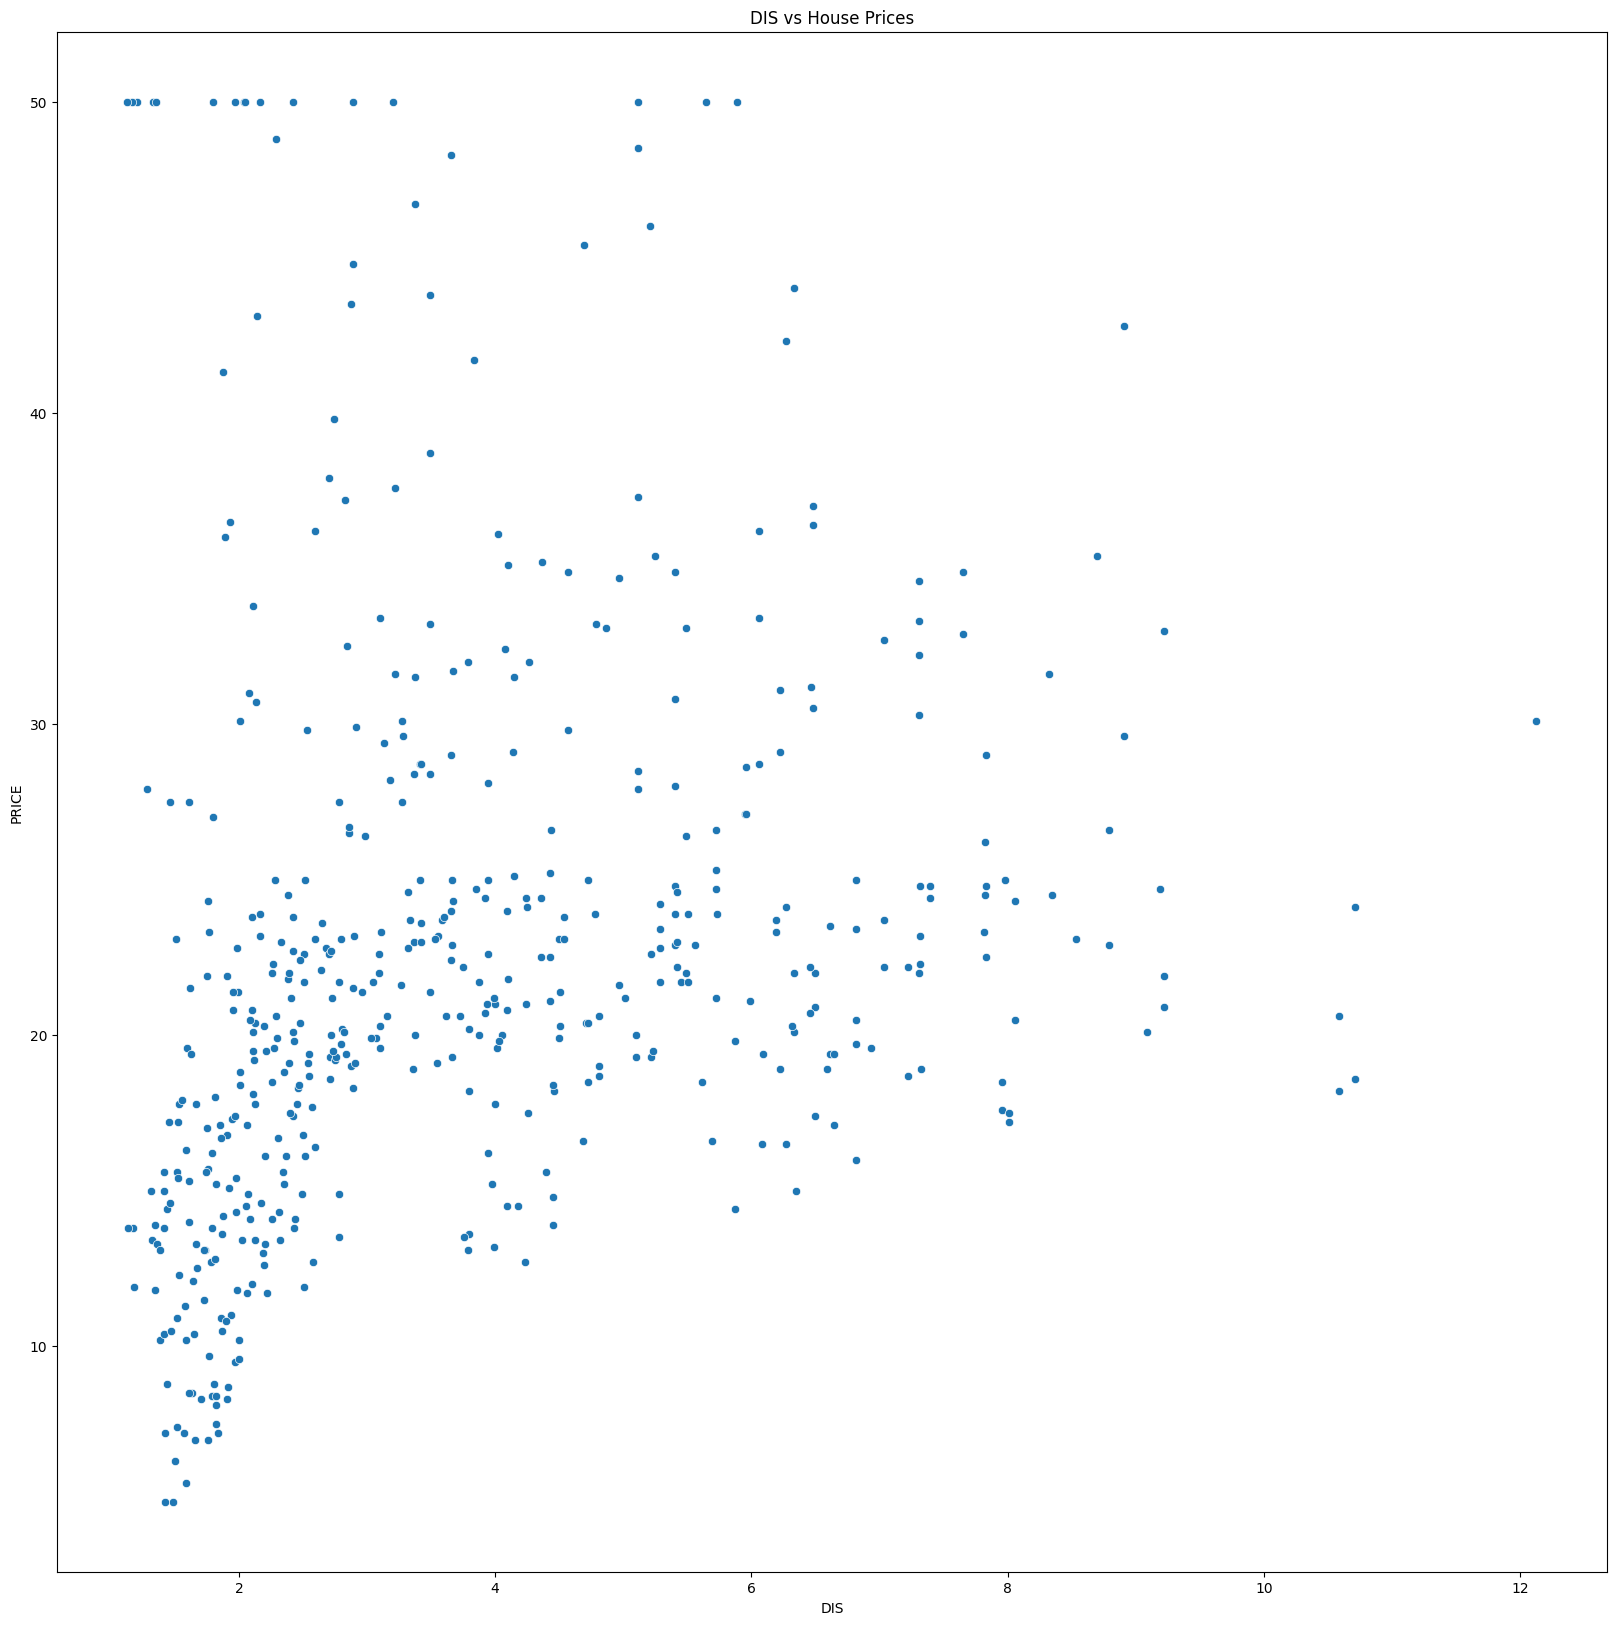

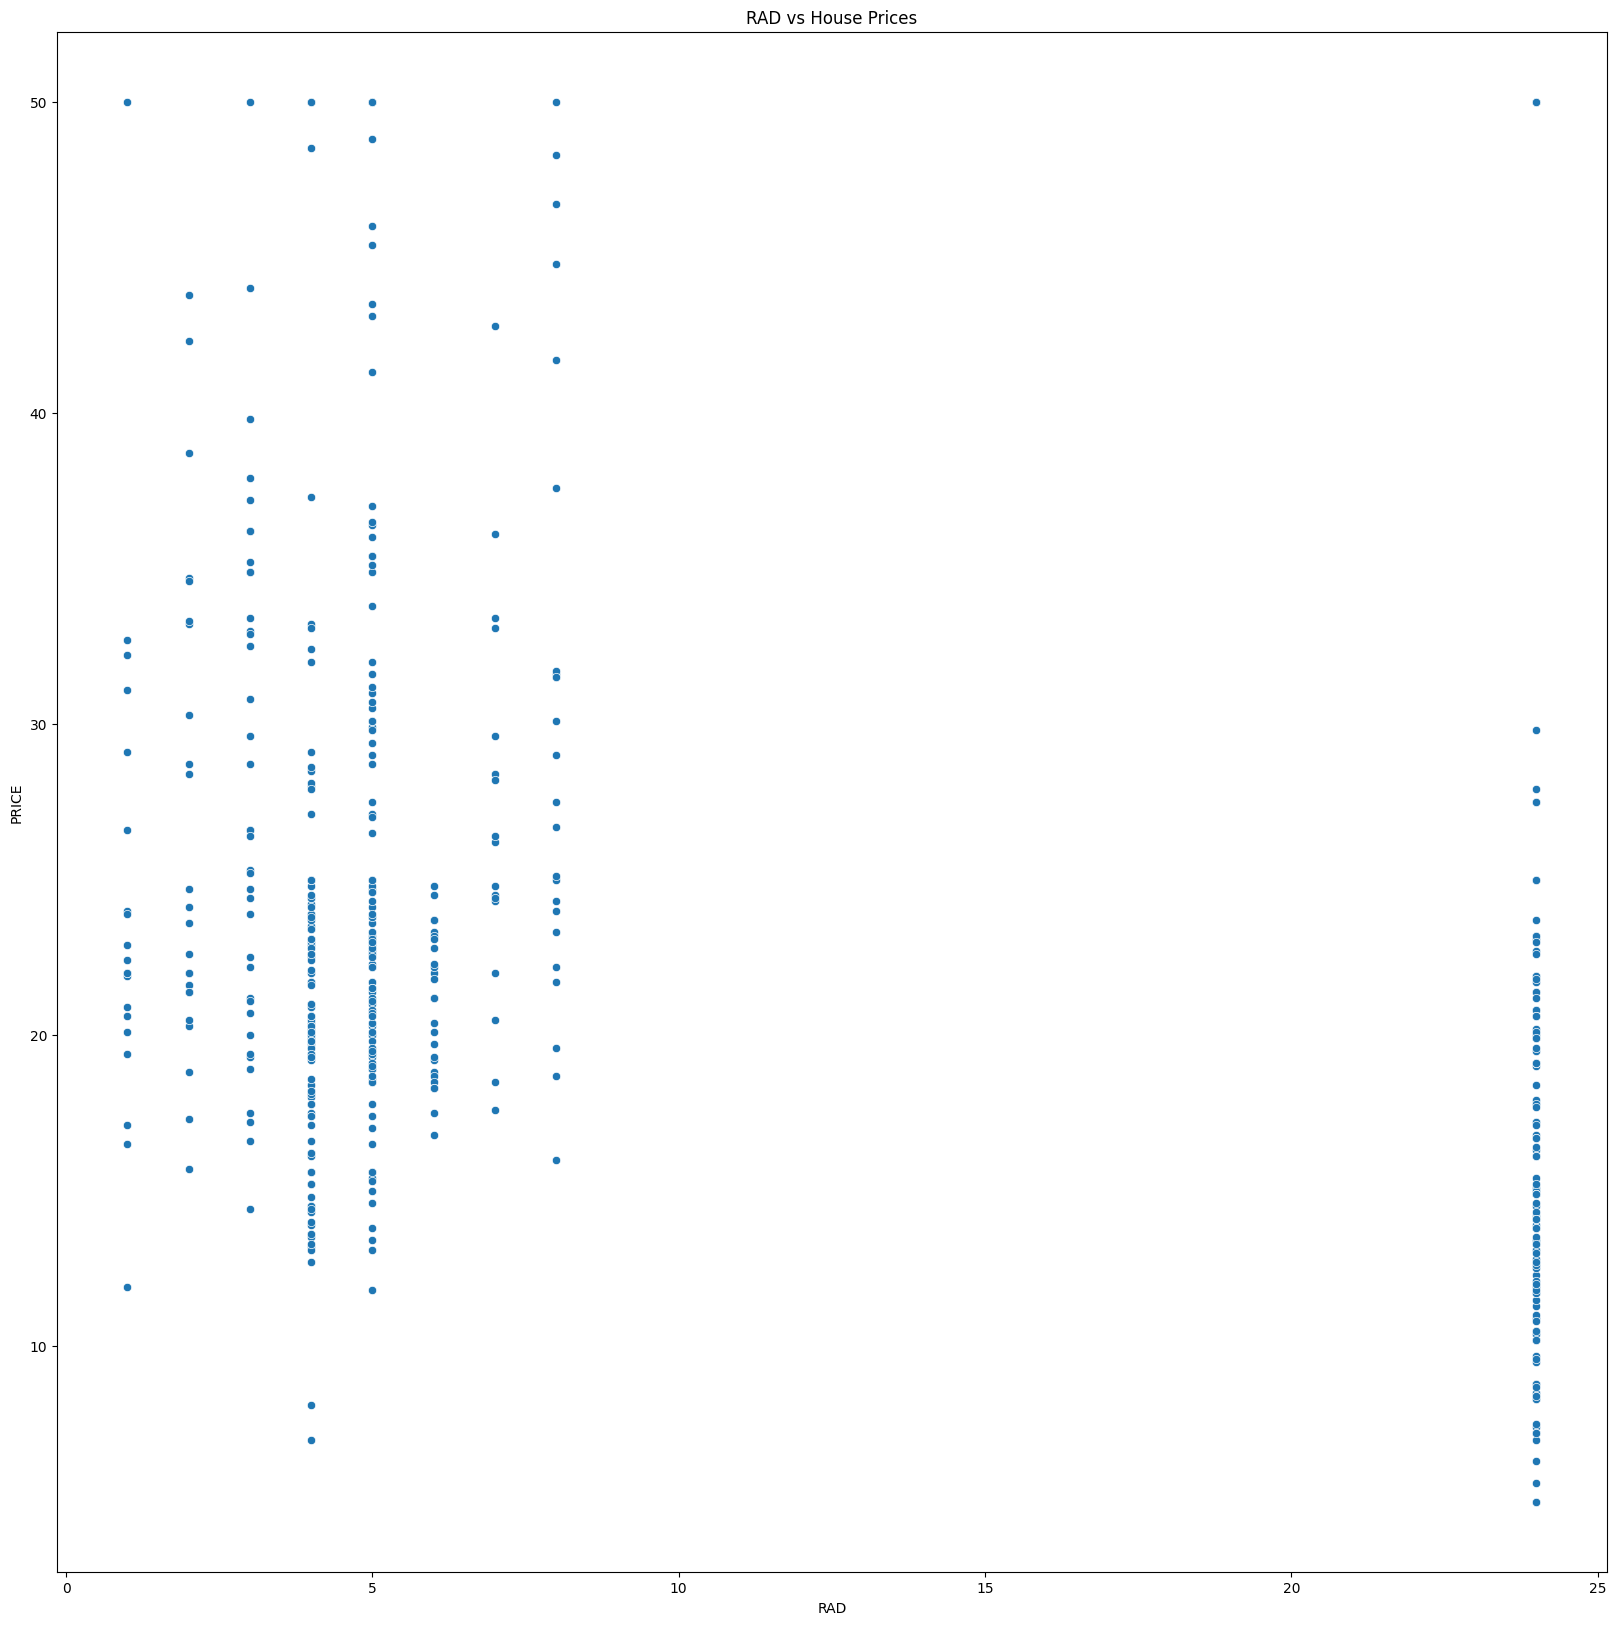

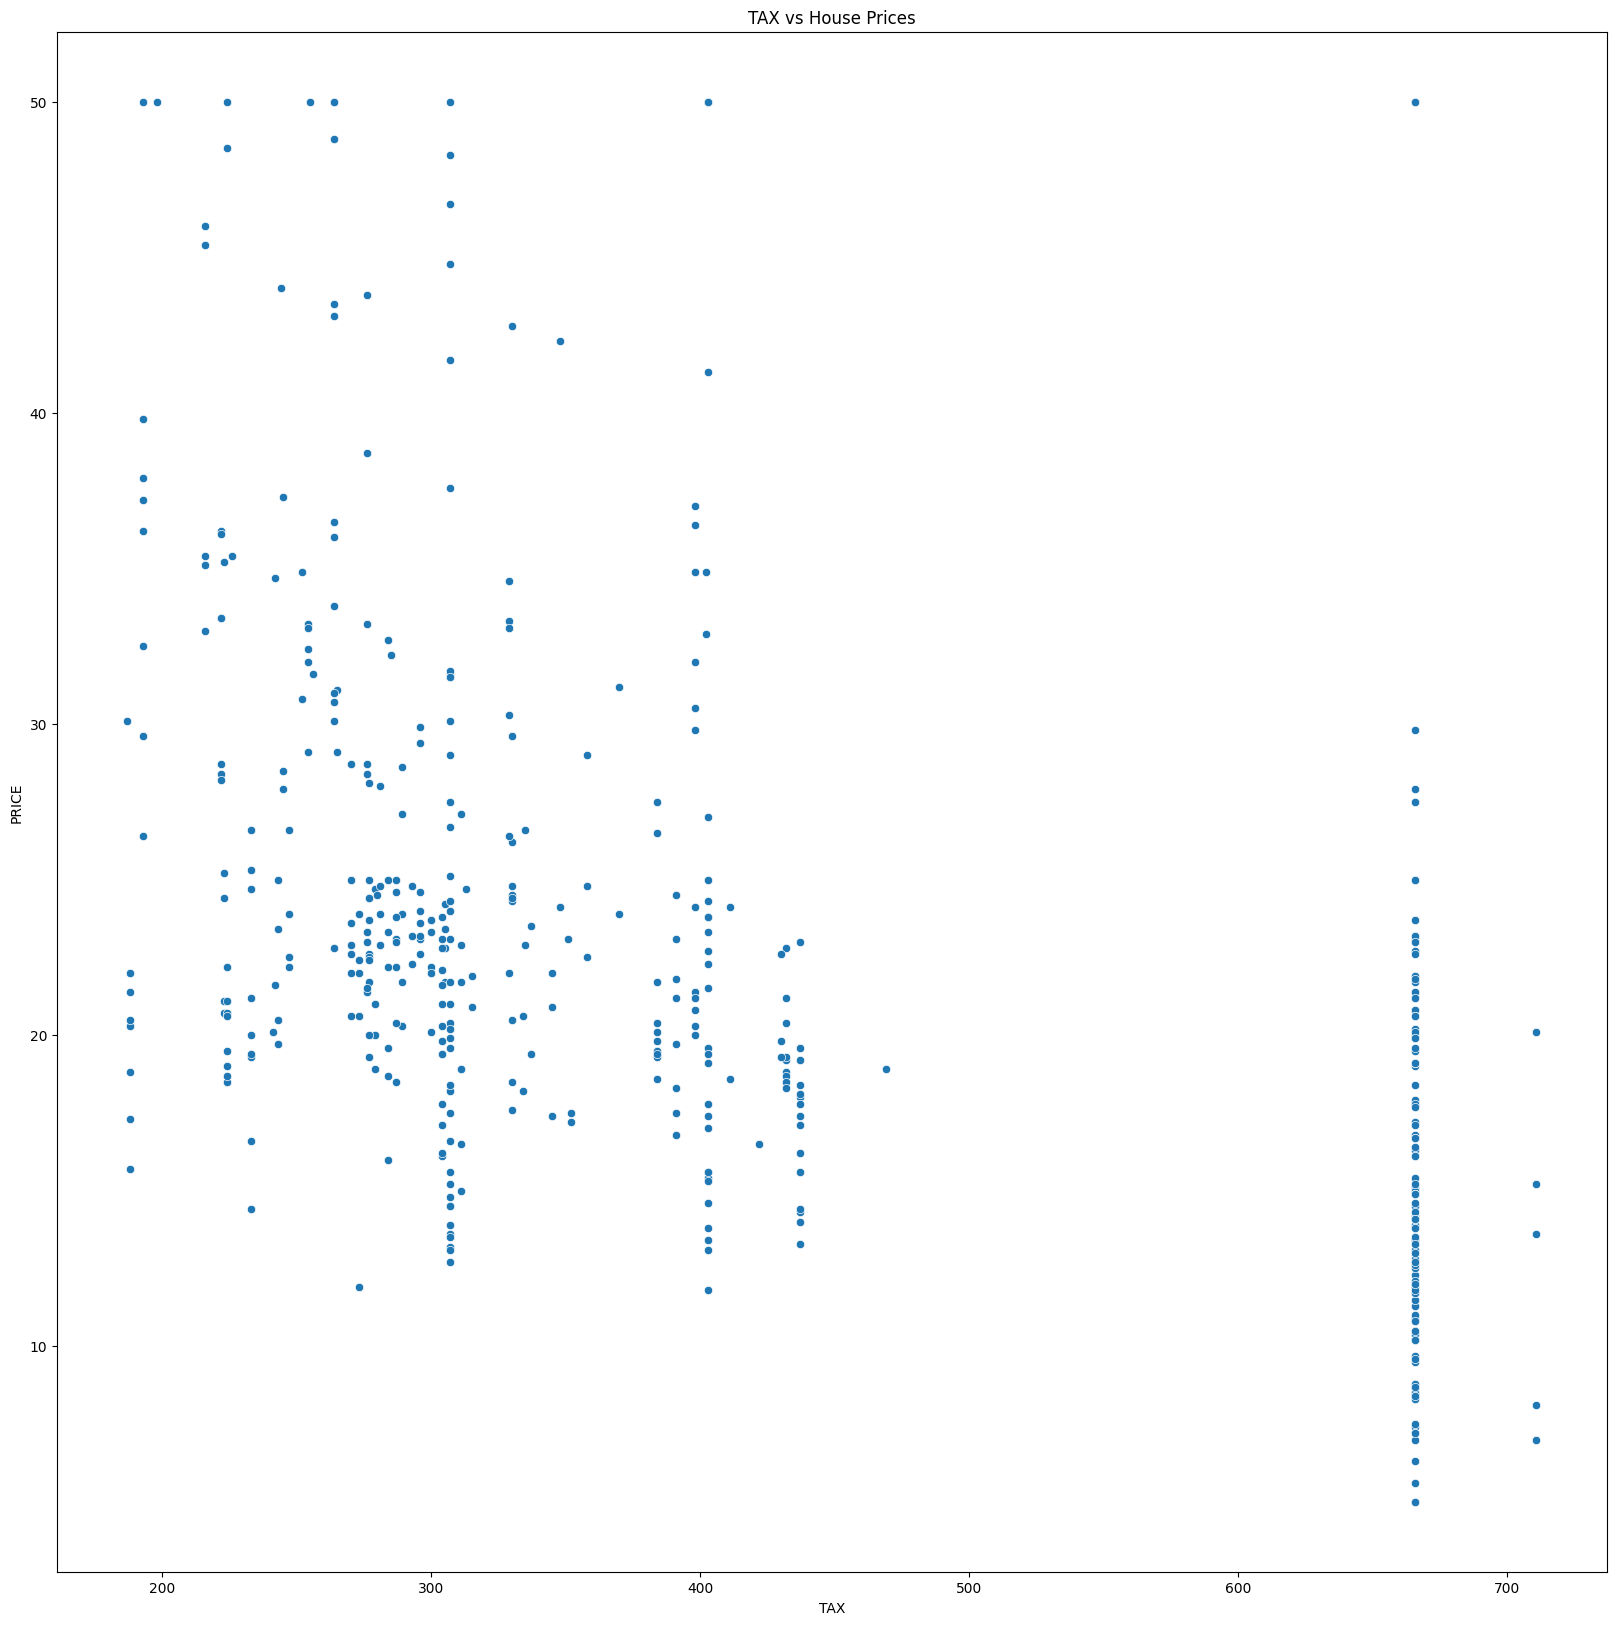

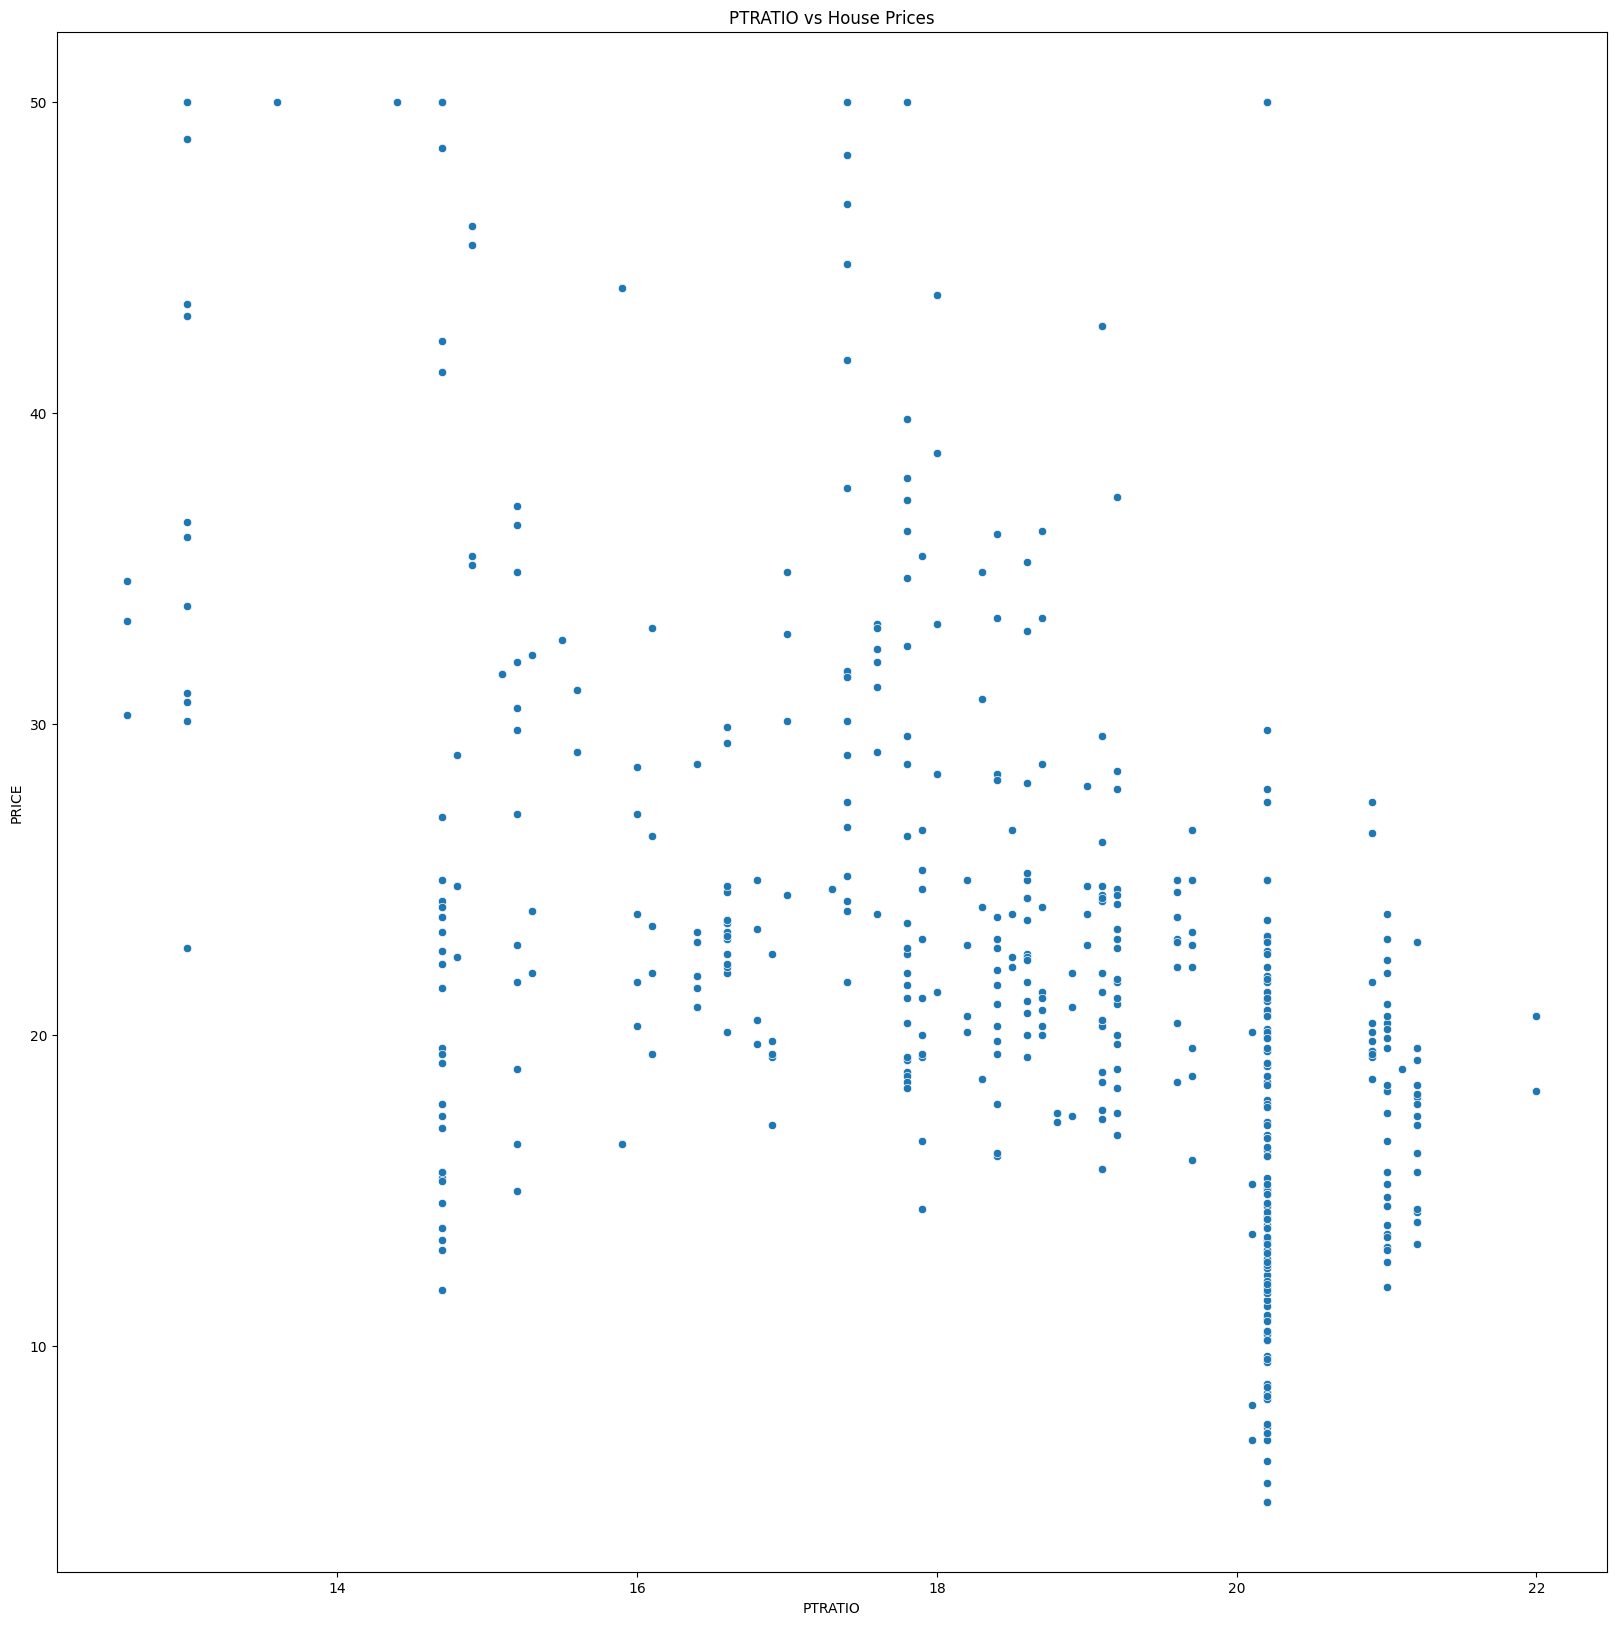

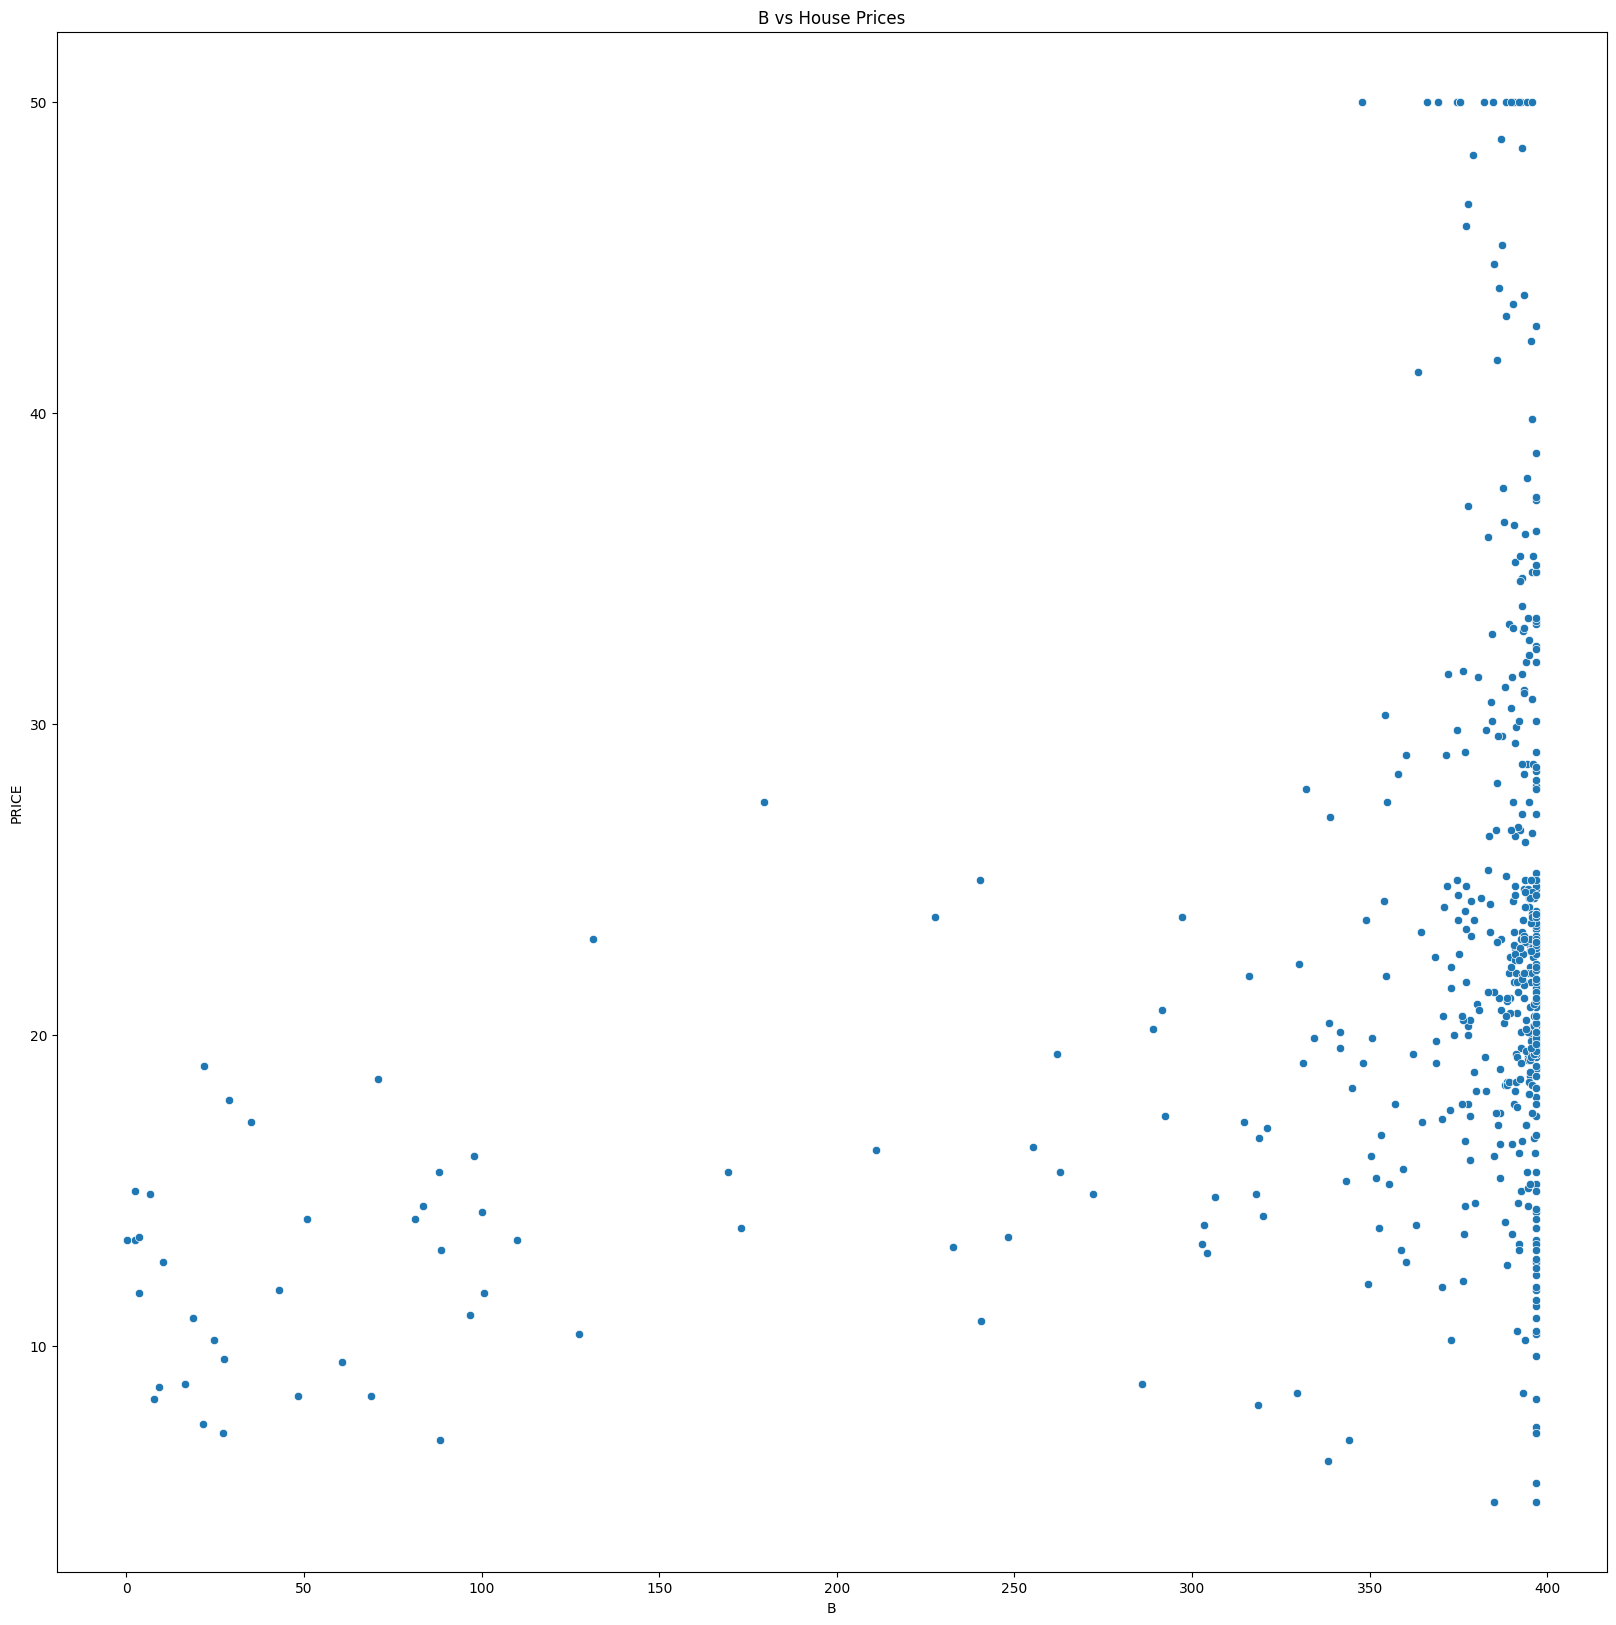

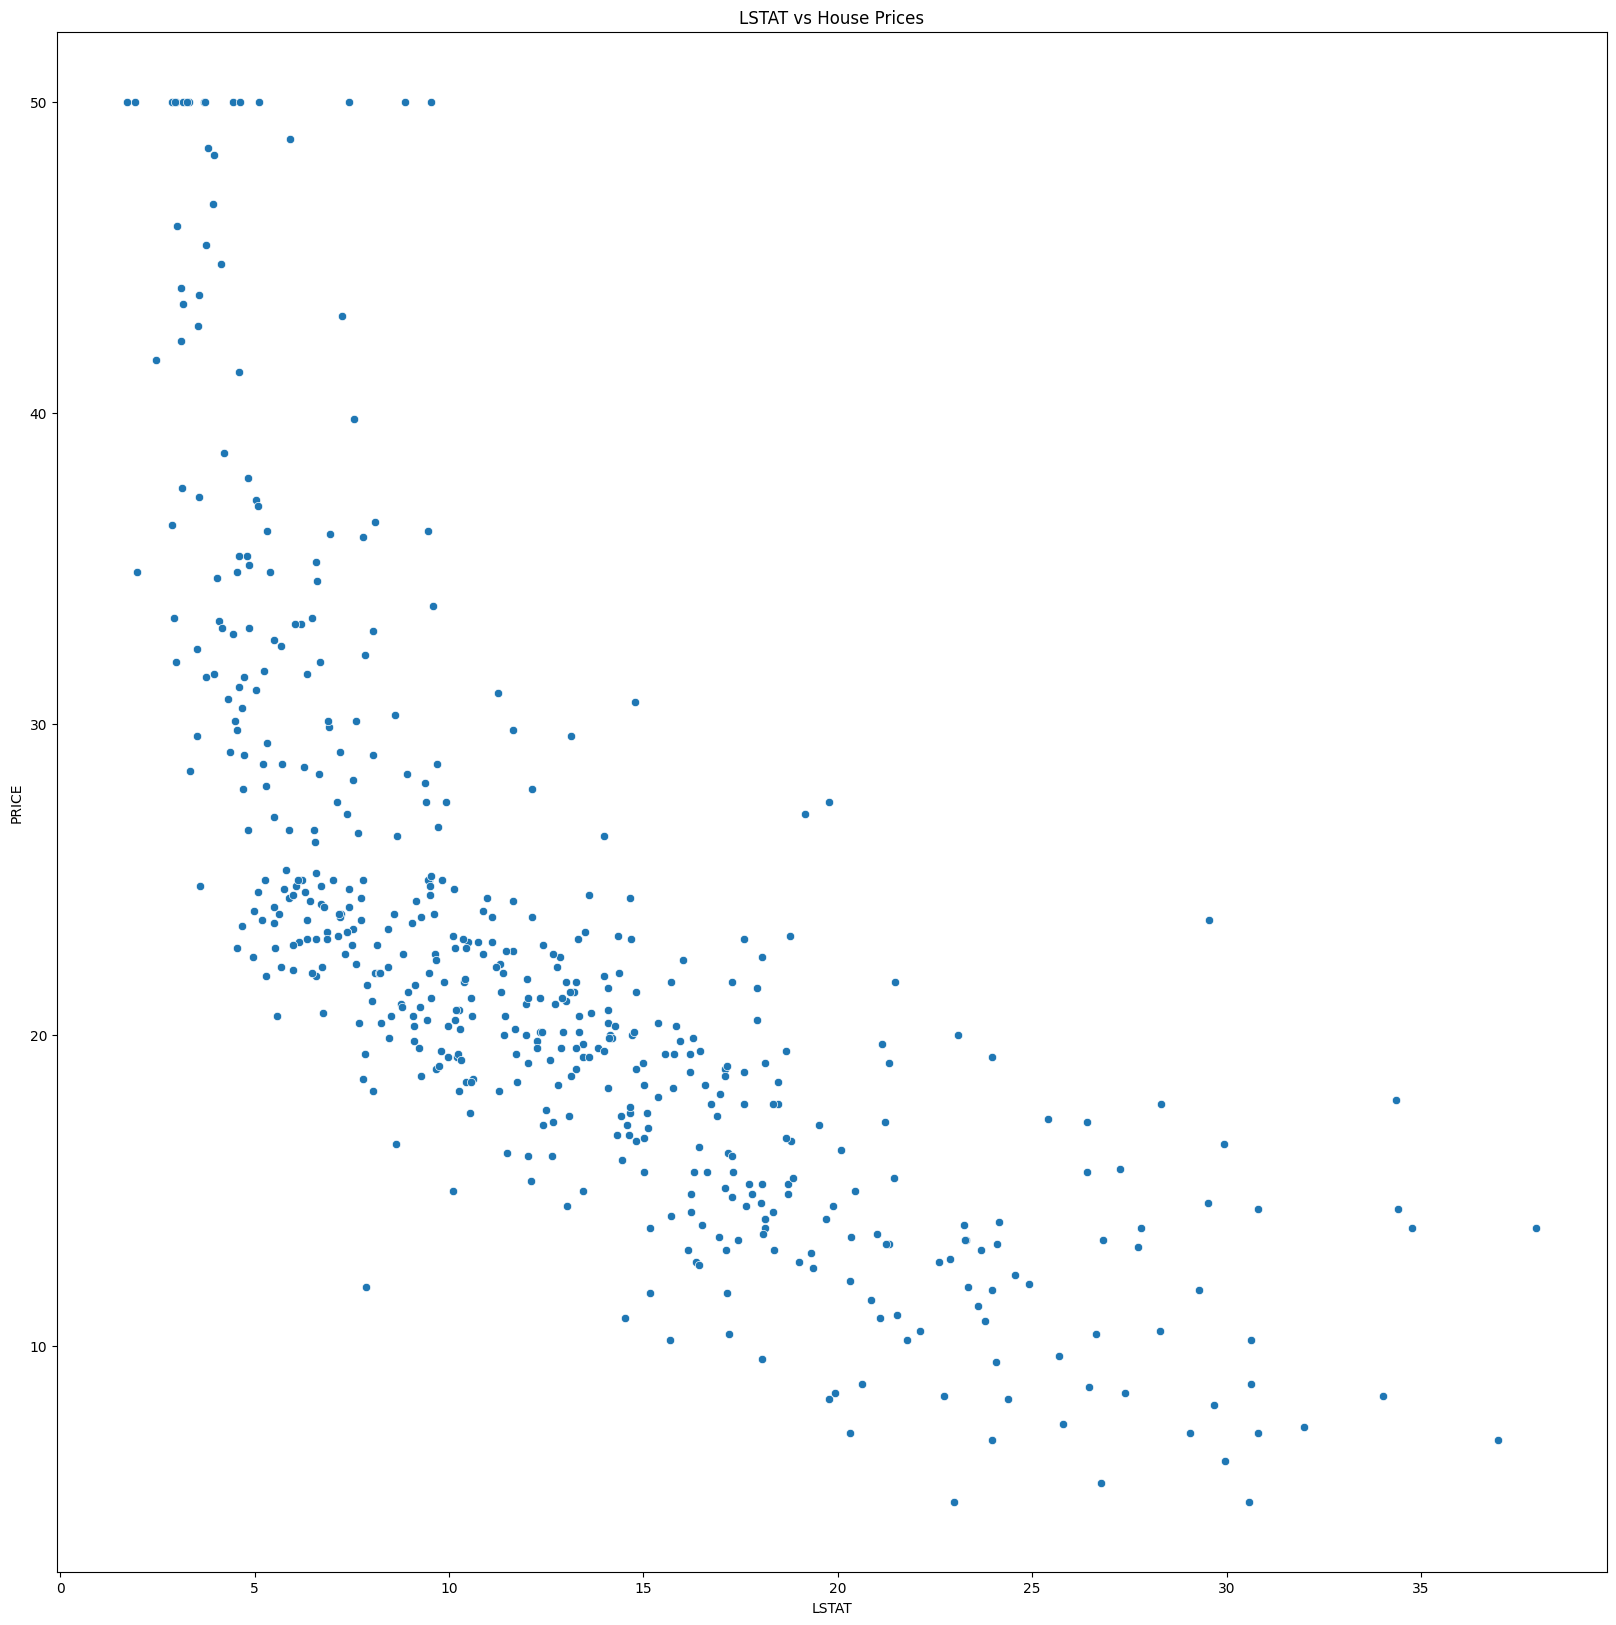

In [35]:
for feature in df1.columns[:-1]:
    sns.scatterplot(x=feature, y="PRICE", data=df1)
    plt.title(f"{feature} vs House Prices")
    plt.show()

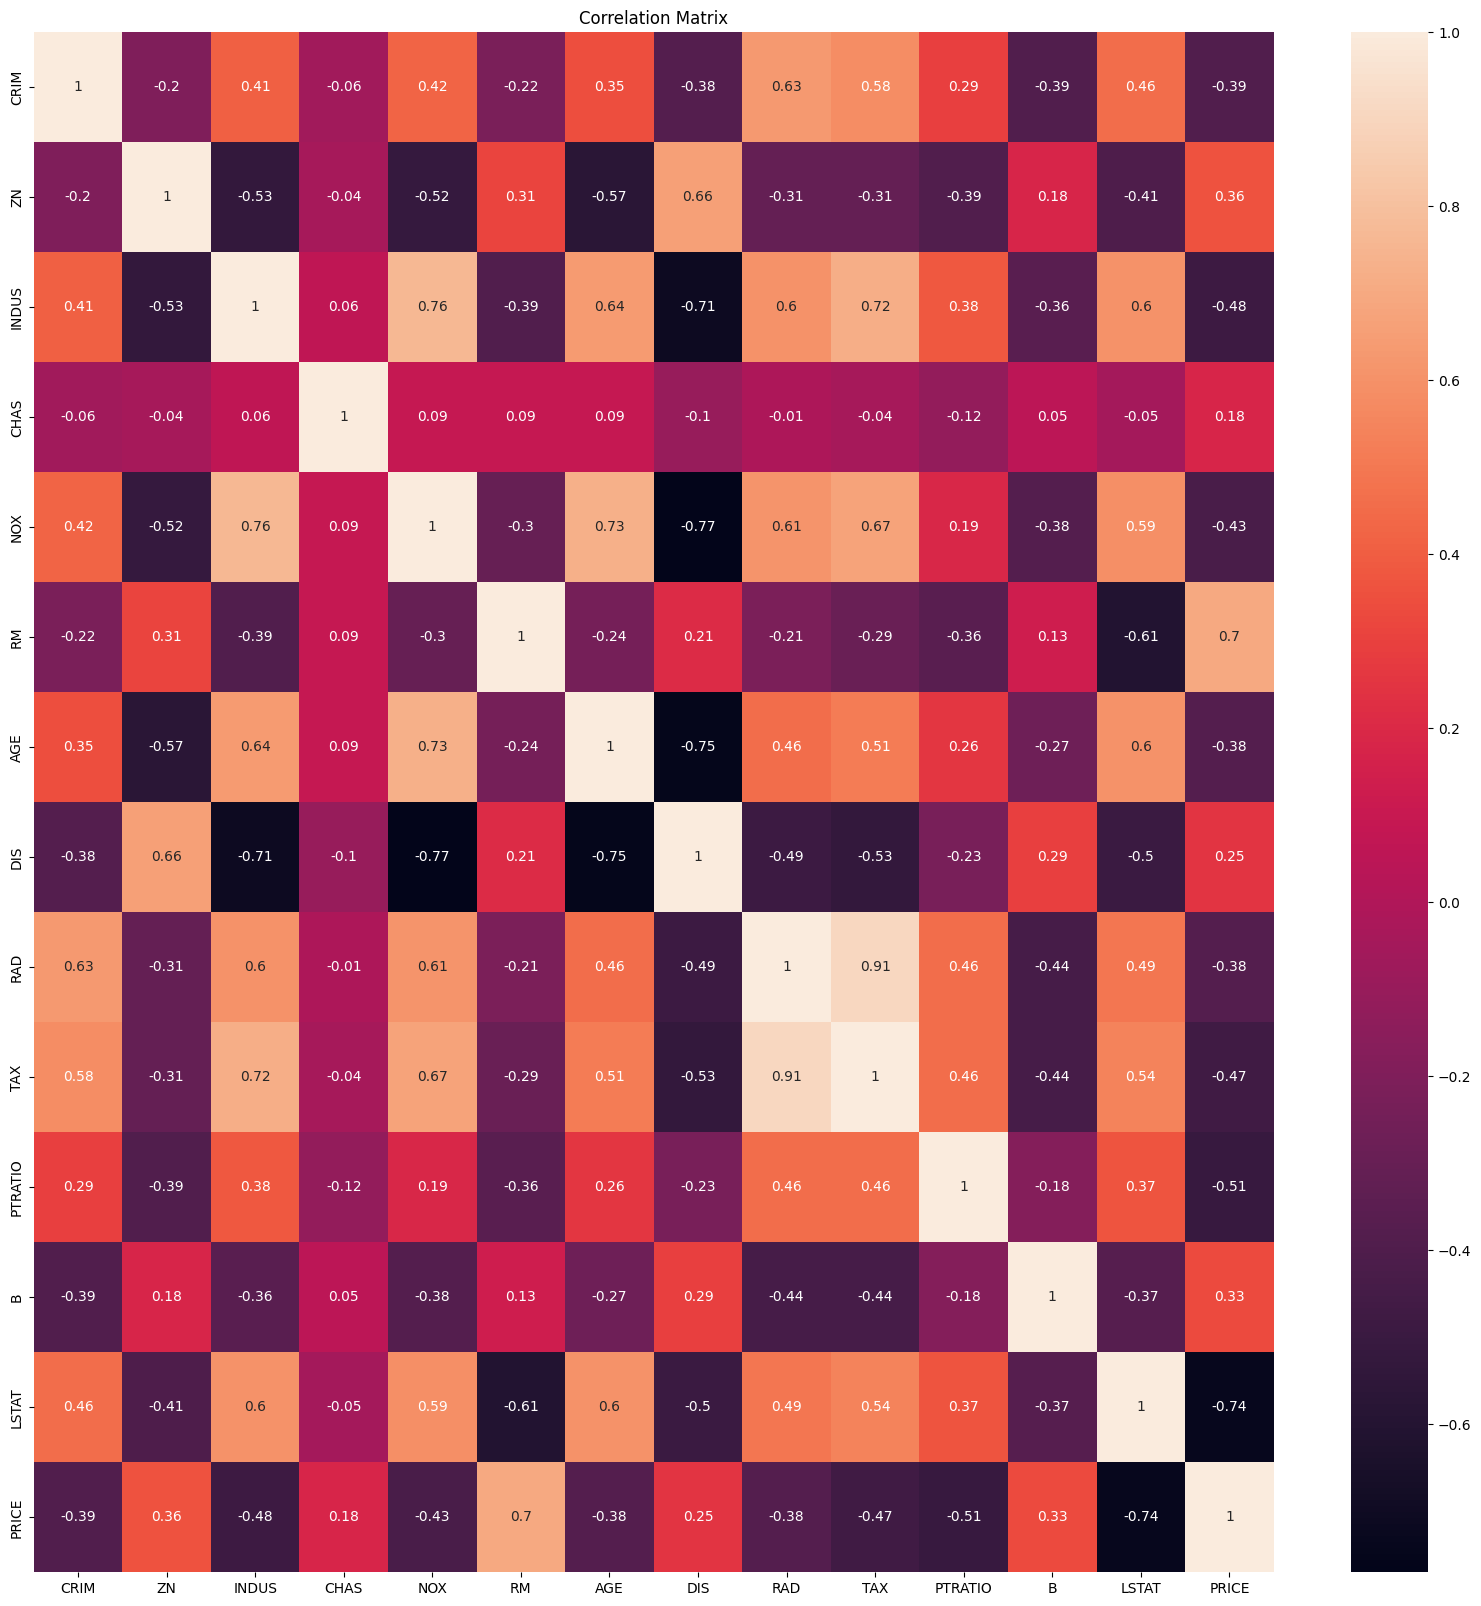

In [36]:
# Correlation Matrix
corr_matrix = df1.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(data=corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [18]:
feature_names = df1.columns.drop('PRICE')
x_train, x_test, y_train, y_test = train_test_split(df1[feature_names], df1["PRICE"], test_size=0.2, random_state=42)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [55]:
# Initialize the models
lr = LinearRegression()
rfr = RandomForestRegressor(random_state=42)
xgbr = XGBRegressor(learning_rate=0.05, random_state=42)

# Train the models
lr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [57]:
# Predictions
y_pred_lr = lr.predict(x_test)
y_pred_rfr = rfr.predict(x_test)
y_pred_xgbr = xgbr.predict(x_test)

# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    p = x_train.shape[1]
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    print(f"{model_name} - Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - Mean Absolute Error: {mae:.2f}")
    print(f"{model_name} - R Squared: {r2:.2f}")
    print(f"{model_name} - Adjusted R Squared: {adjusted_r2:.2f}\n")

# Model Evaluation
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rfr, "Random Forest Regressor")
evaluate_model(y_test, y_pred_xgbr, "XGBoost Regressor")

Linear Regression - Mean Squared Error: 24.29
Linear Regression - Mean Absolute Error: 3.19
Linear Regression - R Squared: 0.67
Linear Regression - Adjusted R Squared: 0.62

Random Forest Regressor - Mean Squared Error: 7.83
Random Forest Regressor - Mean Absolute Error: 2.03
Random Forest Regressor - R Squared: 0.89
Random Forest Regressor - Adjusted R Squared: 0.88

XGBoost Regressor - Mean Squared Error: 7.07
XGBoost Regressor - Mean Absolute Error: 1.92
XGBoost Regressor - R Squared: 0.90
XGBoost Regressor - Adjusted R Squared: 0.89

